<h1 align="center">Loan - Credit Risk & Population Stability</h1>
<h2>About Dataset</h2>
<p>Loan - Credit Risk & Population Stability is a part of Lending Club Company public database.
LendingClub is a US peer-to-peer lending company, headquartered in San Francisco, California. It was the first peer-to-peer lender to register its offerings as securities with the Securities and Exchange Commission (SEC), and to offer loan trading on a secondary market. LendingClub is the world's largest peer-to-peer lending platform.</p>
<p>The data was divided into two parts.</p>
<p>The first data (loan_2014-2018.csv) contains almoust 1800 000 consumer loans issued from 2014 to 2018.
The second one (loan_2019-2020.csv) is specially separated to check if model have similar characteristics and is still up to date.</p>
<strong><p>In this project, I will only use the "loan_2019-2020.csv" dataset</p></strong>
<h2>Data Source</h2>
<p>Kaggle: <a href="https://www.kaggle.com/datasets/beatafaron/loan-credit-risk-and-population-stability">Loan - Credit Risk & Population Stability</a></p>

In [1]:
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')
# from IPython.display import display

# 1. Data Collecting

## 1. Understanding Data

<strong>Understand what the dataset contains</strong>

In [7]:
df_dict = pd.read_excel("./datasets/LoanDataDictionary.xlsx")

In [3]:
# Display all rows
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
display(df_dict.head())

,LoanStatNew,Description
0,acc_now_delinq,The number of accounts on which the borrower is now delinquent.
1,acc_open_past_24mths,Number of trades opened in past 24 months.
2,addr_state,The state provided by the borrower in the loan application
3,all_util,Balance to credit limit on all trades
4,annual_inc,The self-reported annual income provided by the borrower during registration.


In [8]:
df_dict[df_dict['LoanStatNew'] == 'total_cu_tl']

,LoanStatNew,Description
103,total_cu_tl,Number of finance trades


## 2. Feature Selection

<strong>Conclusion</strong>
<p>After understanding the dataset and because the dataset is too large, I will select the features that are relevant to the analysis and create them into a new CSV file. I will choose features:<p>
<ul>
<li>Will not include outstanding "loan_status"</li>
<li>The total deselected features are now more than 100 features, due to redundancy, administrative reasons, or simply reflecting the status after the loan has been granted.</li>
<li>The best features selected were 53 features, which in my opinion have a direct relationship with the risk of default.</li>
</ul>
<p>I did not include the grade feature because, this feature is not raw data, but the result of the lender's internal algorithm which has taken into account other factors. The feature grade itself is categorical and has been classified by the lender.</p>

In [2]:
selected_features = [
    "acc_now_delinq",  # 1. Number of accounts currently delinquent
    "all_util",  # 2. Balance to credit limit ratio on all trades
    "bc_util",  # 3. Percentage of bankcard credit usage
    "delinq_2yrs",  # 4. Number of delinquency incidents (30+ days past due) in the last 2 years
    "delinq_amnt",  # 5. Total past-due amount for delinquent accounts
    "dti",  # 6. Debt-to-income ratio
    "fico_range_high",  # 7. Highest FICO score of the borrower
    "fico_range_low",  # 8. Lowest FICO score of the borrower
    "int_rate",  # 9. Interest rate of the loan
    "loan_status",  # 10. Current status of the loan (e.g., charged-off, fully paid, late)
    "num_accts_ever_120_pd",  # 11. Number of accounts ever 120+ days past due
    "num_tl_120dpd_2m",  # 12. Number of accounts currently 120+ days past due in the last 2 months
    "num_tl_30dpd",  # 13. Number of accounts currently 30+ days past due
    "num_tl_90g_dpd_24m",  # 14. Number of accounts 90+ days past due in the last 24 months
    "mo_sin_old_il_acct",  # 15. Months since oldest installment account opened
    "mo_sin_old_rev_tl_op",  # 16. Months since oldest revolving account opened
    "mo_sin_rcnt_rev_tl_op",  # 17. Months since most recent revolving account opened
    "mo_sin_rcnt_tl",  # 18. Months since most recent account opened
    "mort_acc",  # 19. Number of mortgage accounts
    "num_actv_bc_tl",  # 20. Number of active bankcard accounts
    "num_actv_rev_tl",  # 21. Number of active revolving accounts
    "num_bc_sats",  # 22. Number of satisfactory bankcard accounts
    "num_bc_tl",  # 23. Number of bankcard accounts
    "num_il_tl",  # 24. Number of installment loan accounts
    "num_op_rev_tl",  # 25. Number of open revolving accounts
    "num_rev_accts",  # 26. Number of revolving accounts
    "num_rev_tl_bal_gt_0",  # 27. Number of revolving trades with a balance greater than 0
    "revol_bal",  # 28. Total revolving balance
    "revol_util",  # 29. Revolving credit utilization percentage
    "total_bal_ex_mort",  # 30. Total balance excluding mortgage
    "total_bc_limit",  # 31. Total credit limit for bankcards
    "total_il_high_credit_limit",  # 32. Total high credit limit for installment loans
    "num_sats",  # 33. Number of satisfactory accounts
    "num_tl_op_past_12m",  # 34. Number of accounts opened in the past 12 months
    "pct_tl_nvr_dlq",  # 35. Percentage of trades that were never delinquent
    "percent_bc_gt_75",  # 36. Percentage of bankcards with balances greater than 75% of the credit limit
    "total_bal_il",  # 37. Total installment loan balance
    "total_rev_hi_lim",  # 38. Total revolving high credit limit
    "mths_since_recent_bc_dlq",  # 39. Months since the last delinquency on a bankcard
    "mths_since_recent_inq",  # 40. Months since the last credit inquiry
    "mths_since_recent_revol_delinq",  # 41. Months since the last revolving delinquency
    "num_rev_accts", # 42. Number of revolving accounts
    "num_op_rev_tl", # 43. The number of revolving accounts that are still open
    "num_actv_rev_tl", # 44. Number of active revolving accounts
    "num_bc_sats", # 45. Number of credit card accounts that are in good standing
    "num_tl_90g_dpd_24m", # 46. Number of accounts that have experienced delays of more than 90 days in the last 24 months
    "num_tl_op_past_12m", # 47. Number of credit accounts opened in the last 12 months
    "mo_sin_old_il_acct", # 48. Length of time since the first installment account was opened
    "mo_sin_rcnt_tl", # 49. Length of time since the latest credit account was opened
    "num_il_tl", # 50. Number of installment accounts
    "num_tl_30dpd", # 51. The number of accounts experiencing delays of more than 30 days at this time
    "num_tl_120dpd_2m", # 52. Number of accounts that are more than 120 days late in the last 2 months
    "num_bc_tl", # 53. Total number of credit card accounts
    "hardship_dpd", # 54. Indicates whether the borrower experienced significant delays before requesting assistance.
    "verification_status", # 55. Income verification status can affect the risk of payment default.
]

## 3. Filtering Feature

In [3]:
df = pd.read_csv("./datasets/loan_2019_20.csv")

/tmp/ipykernel_4343/2217548607.py:1: DtypeWarning: Columns (137) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./datasets/loan_2019_20.csv")


In [4]:
df.shape

(664824, 142)

In [5]:
df = df.loc[:,selected_features]
df.shape

(664824, 55)

In [6]:
df['loan_status'].unique()

array(['Current', 'Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', 'Issued'],
      dtype=object)

In [6]:
df = df[df['loan_status'] != 'Current']
df.shape

(93956, 55)

In [8]:
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_actv_rev_tl,num_bc_sats,num_tl_90g_dpd_24m,num_tl_op_past_12m,mo_sin_old_il_acct,mo_sin_rcnt_tl,num_il_tl,num_tl_30dpd,num_tl_120dpd_2m,num_bc_tl
9,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,4.0,2.0,0.0,3.0,164.0,7.0,7.0,0.0,0.0,5.0
20,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,5.0,9.0,0.0,1.0,107.0,2.0,6.0,0.0,0.0,12.0
22,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,10.0,8.0,0.0,3.0,171.0,1.0,14.0,0.0,0.0,12.0
31,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,4.0,4.0,3.0,0.0,NaN,27.0,0.0,0.0,0.0,7.0
32,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,3.0,3.0,0.0,2.0,238.0,7.0,11.0,0.0,0.0,4.0


In [7]:
df.to_csv('./datasets/loan_2019_20_filtered.csv', index=False)

<p><strong>Note: </strong>The filter is done by not including loan_status with the value 'Current' because I will analyze data that has already been completed. Then I saved it into a new CSV file to make it easier in the future.</p>

# 2. Data Preprocessing

In [2]:
df = pd.read_csv("./datasets/loan_2019_20_filtered.csv")
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_tl_90g_dpd_24m.1,num_tl_op_past_12m.1,mo_sin_old_il_acct.1,mo_sin_rcnt_tl.1,num_il_tl.1,num_tl_30dpd.1,num_tl_120dpd_2m.1,num_bc_tl.1,hardship_dpd,verification_status
0,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,0.0,3.0,164.0,7.0,7.0,0.0,0.0,5.0,NaN,Source Verified
1,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,0.0,1.0,107.0,2.0,6.0,0.0,0.0,12.0,NaN,Not Verified
2,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,0.0,3.0,171.0,1.0,14.0,0.0,0.0,12.0,NaN,Not Verified
3,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,3.0,0.0,NaN,27.0,0.0,0.0,0.0,7.0,NaN,Not Verified
4,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,0.0,2.0,238.0,7.0,11.0,0.0,0.0,4.0,NaN,Not Verified


## 1. Missing Value

In [3]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info

,Missing Values,Percentage (%)
all_util,32,0.034058
bc_util,1486,1.581591
dti,239,0.254374
num_tl_120dpd_2m,1742,1.854059
mo_sin_old_il_acct,2259,2.404317
revol_util,168,0.178807
percent_bc_gt_75,1441,1.533697
mths_since_recent_bc_dlq,74687,79.491464
mths_since_recent_inq,7821,8.324109
mths_since_recent_revol_delinq,66246,70.507472


The features mths_since_recent_bc_dlq and mths_since_recent_revol_delinq will be the main concern in handling missing values ​​because they have a high percentage, namely 70% and 79%. This value is very reasonable because these two features contain the last time a customer experienced a payment delay, which means the value is empty or NaN has never been delayed so it must be handled carefully.

In [4]:
def categorize_delinquency(months):
    if pd.isna(months):  # Never late
        return 0
    elif months <= 6:  # Just late
        return 1
    elif months <= 12:  # Delayed in the last 7-12 months
        return 2
    elif months <= 24:  # It's been quite a while since the last late one
        return 3
    else:  # It's been over 2 years since the last delay
        return 4

In [5]:
df["revol_delinq_category"] = df["mths_since_recent_revol_delinq"].apply(categorize_delinquency)
df["bc_delinq_category"] = df["mths_since_recent_bc_dlq"].apply(categorize_delinquency)
df.drop(columns=['mths_since_recent_revol_delinq','mths_since_recent_bc_dlq'], inplace=True)

<p>To handle these two features, I did not delete the two features even though many values ​​were lost because they would be very meaningful so I did not delete them.</p>
<p>I prefer to create a new column to handle this where:</p>
<ul>
<li>0 = Never late</li>
<li>1 = Just late</li>
<li>2 = Delayed in the last 7-12 months</li>
<li>3 = It's been quite a while since the last late one</li>
<li>4 = It's been over 2 years since the last delay</li>
</ul>
I think this will be more objective and will be useful for future analysis.

In [6]:
max_value = df["mths_since_recent_inq"].max()
df["mths_since_recent_inq"].fillna(max_value, inplace=True)

/tmp/ipykernel_7944/1932300693.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mths_since_recent_inq"].fillna(max_value, inplace=True)


<p>mths_since_recent_inq, this feature shows the number of months since the borrower last submitted a new credit application (credit inquiry)</p>
<p>So to fill in the missing value with 999 which shows that the borrower has never applied for new credit.</p>

In [7]:
df[["mo_sin_old_il_acct", "mo_sin_old_il_acct.1"]].corr()


,mo_sin_old_il_acct,mo_sin_old_il_acct.1
mo_sin_old_il_acct,1.0,1.0
mo_sin_old_il_acct.1,1.0,1.0


In [8]:
df.drop(columns=['mo_sin_old_il_acct.1'], inplace=True)

<p>Because the features mo_sin_old_il_acct and mo_sin_old_il_acct.1 have similar names, I checked whether the two features were identical. The results said that one of these features was duplicated, so I deleted one of the features.</p>

In [9]:
df["mo_sin_old_il_acct"].fillna(0, inplace=True)
df["percent_bc_gt_75"].fillna(0, inplace=True)
df["all_util"].fillna(0, inplace=True)
df["bc_util"].fillna(0, inplace=True)
df["revol_util"].fillna('0%', inplace=True)
df['dti'].fillna(0, inplace=True)

/tmp/ipykernel_7944/818717687.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["mo_sin_old_il_acct"].fillna(0, inplace=True)
/tmp/ipykernel_7944/818717687.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try us

<table boreder="1">
<tr>
<th>Feature</th>
<th>Filled with</th>
<th>Reason</th>
</tr>
<tr>
<th>mo_sin_old_il_acct</th>
<th>0</th>
<th>The borrower does not have an installment account, so the age of the oldest installment account is 0 months.</th>
</tr>
<tr>
<th>percent_bc_gt_75</th>
<th>0</th>
<th>The borrower does not have a credit card or no card is used >75% of the limit.</th>
</tr>
<tr>
<th>all_util</th>
<th>0</th>
<th>The borrower does not have credit whose utilization can be calculated.</th>
</tr>
<tr>
<th>bc_util</th>
<th>0</th>
<th>The borrower does not have a credit card, so credit card utilization is 0%.</th>
</tr>
<tr>
<th>revol_util</th>
<th>0%</th>
<th>The borrower does not have revolving credit, so the utilization is 0% (fixed format in percent).</th>
</tr>
<tr>
<th>dti</th>
<th>0</th>
<th>The borrower has no debt compared to his income, so the debt to income ratio is 0%.</th>
</tr>
</table>

In [10]:
print("num_tl_120dpd_2m: ",df["num_tl_120dpd_2m"].unique())
print("num_tl_120dpd_2m.1: ",df["num_tl_120dpd_2m.1"].unique())

num_tl_120dpd_2m:  [ 0. nan]
num_tl_120dpd_2m.1:  [ 0. nan]


In [11]:
df.drop(columns=['hardship_dpd','num_tl_120dpd_2m','num_tl_120dpd_2m.1'], inplace=True)

<table boreder="1">
<tr>
<th>Removed Features</th>
<th>Reason</th>
</tr>
<tr>
<th>num_tl_120dpd_2m</th>
<th>All values ​​are 0 or NaN, no information for credit risk analysis.</th>
</tr>
<tr>
<th>num_tl_120dpd_2m.1</th>
<th>Duplication of num_tl_120dpd_2m, not required in the dataset.</th>
</tr>
<tr>
<th>hardship_dpd</th>
<th>It could be that this feature is more of an outlier, because only a few borrowers qualify so 97% of the value is lost</th>
</tr>
</table>

In [12]:
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_percentage = (missing_values / len(df)) * 100
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage (%)': missing_percentage})
missing_info

,Missing Values,Percentage (%)


In [13]:
df.shape

(93956, 51)

## 2. Duplicates

In [14]:
total_dupli = df.duplicated().sum()
print("Total duplicates in a row: ", total_dupli)

Total duplicates in a row:  0


In [15]:
# List of possible duplicate features
duplicate_features = {
    "num_rev_accts.1": "num_rev_accts",
    "num_op_rev_tl.1": "num_op_rev_tl",
    "num_actv_rev_tl.1": "num_actv_rev_tl",
    "num_bc_sats.1": "num_bc_sats",
    "num_tl_op_past_12m.1": "num_tl_op_past_12m",
    "mo_sin_rcnt_tl.1": "mo_sin_rcnt_tl",
    "num_il_tl.1": "num_il_tl",
    "num_bc_tl.1": "num_bc_tl",
    "num_tl_30dpd.1": "num_tl_30dpd",
    "num_tl_90g_dpd_24m.1": "num_tl_90g_dpd_24m"
}


In [16]:
# Check whether the duplicate features are identical to the original version
for dup, original in duplicate_features.items():
    if dup in df.columns and original in df.columns:  
        is_identical = df[dup].equals(df[original])  
        print(f"Whether {dup} identical to {original}? → {is_identical}")


Whether num_rev_accts.1 identical to num_rev_accts? → True
Whether num_op_rev_tl.1 identical to num_op_rev_tl? → True
Whether num_actv_rev_tl.1 identical to num_actv_rev_tl? → True
Whether num_bc_sats.1 identical to num_bc_sats? → True
Whether num_tl_op_past_12m.1 identical to num_tl_op_past_12m? → True
Whether mo_sin_rcnt_tl.1 identical to mo_sin_rcnt_tl? → True
Whether num_il_tl.1 identical to num_il_tl? → True
Whether num_bc_tl.1 identical to num_bc_tl? → True
Whether num_tl_30dpd.1 identical to num_tl_30dpd? → True
Whether num_tl_90g_dpd_24m.1 identical to num_tl_90g_dpd_24m? → True


In [17]:
# List of features to be removed
features_to_drop = []

for dup, original in duplicate_features.items():
    if dup in df.columns and original in df.columns:  
        if df[dup].equals(df[original]):  
            features_to_drop.append(dup)

# Remove duplicate features if any are identical
if features_to_drop:
    df.drop(columns=features_to_drop, inplace=True)
    print(f"Removed feature due to duplicate: {features_to_drop}")
else:
    print("There are no truly identical duplicate features.")


Removed feature due to duplicate: ['num_rev_accts.1', 'num_op_rev_tl.1', 'num_actv_rev_tl.1', 'num_bc_sats.1', 'num_tl_op_past_12m.1', 'mo_sin_rcnt_tl.1', 'num_il_tl.1', 'num_bc_tl.1', 'num_tl_30dpd.1', 'num_tl_90g_dpd_24m.1']


In [19]:
# Save the DataFrame resulting from data cleaning to a file using pickle, so you don't have to do the same steps if you want to do analysis
with open('./datasets/data_cleaned.pkl', 'wb') as file:
    pickle.dump(df, file)

# 3. Exploratory Data Analysis (EDA)

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_cleaned.pkl', 'rb') as file:
    df = pickle.load(file)

In [3]:
df.head()

,acc_now_delinq,all_util,bc_util,delinq_2yrs,delinq_amnt,dti,fico_range_high,fico_range_low,int_rate,loan_status,...,num_sats,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,total_bal_il,total_rev_hi_lim,mths_since_recent_inq,verification_status,revol_delinq_category,bc_delinq_category
0,0.0,72.0,97.6,0.0,0.0,11.88,669.0,665.0,17.19%,Fully Paid,...,9.0,3.0,90.9,100.0,16136.0,6600.0,7.0,Source Verified,4,0
1,0.0,17.0,2.0,0.0,0.0,14.73,769.0,765.0,7.56%,Fully Paid,...,12.0,1.0,100.0,0.0,6549.0,34200.0,2.0,Not Verified,0,0
2,0.0,76.0,77.3,0.0,0.0,25.48,694.0,690.0,14.74%,Charged Off,...,20.0,3.0,94.7,75.0,66285.0,84200.0,1.0,Not Verified,0,0
3,0.0,69.0,68.8,4.0,0.0,6.46,669.0,665.0,20.00%,Fully Paid,...,4.0,0.0,50.0,25.0,0.0,2500.0,25.0,Not Verified,3,3
4,0.0,40.0,26.0,0.0,0.0,17.00,734.0,730.0,12.40%,Fully Paid,...,11.0,2.0,95.2,0.0,57104.0,35000.0,0.0,Not Verified,0,0


In [4]:
df.shape

(93956, 41)

In [5]:
df['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Late (31-120 days)',
       'In Grace Period', 'Late (16-30 days)', 'Default', 'Issued'],
      dtype=object)

<p>Based on Loan Status, I will make the rules:</p>
<ul>
<li>High-Risk Loan: 'Charged Off', 'Default', 'Late (31-120 days)'</li>
<li>Medium-Risk Loan: 'Late (16-30 days)'</li>
<li>Low-Risk Loan: 'In Grace Period'</li>
<li>Very Low-Risk Loan: 'Fully Paid', 'Issued'</li>
</ul>

In [6]:
# Mapping risk categories
risk_mapping = {
    'Fully Paid': 'Very Low-Risk Loan',
    'Issued': 'Very Low-Risk Loan',
    'Charged Off': 'High-Risk Loan',
    'Default': 'High-Risk Loan',
    'Late (31-120 days)': 'High-Risk Loan',
    'Late (16-30 days)': 'Medium-Risk Loan',
    'In Grace Period': 'Low-Risk Loan'
}

# Added risk_category feature
df['risk_category'] = df['loan_status'].map(risk_mapping)

In [7]:
df.shape

(93956, 42)

In [8]:
df['risk_category'].unique()

array(['Very Low-Risk Loan', 'High-Risk Loan', 'Low-Risk Loan',
       'Medium-Risk Loan'], dtype=object)

<p><b>Why am I using loan_status with values: Fully Paid, Charged Off, Late (30-120 days), In Grace Period, Late (16-30 days), Default, and Issued to create risk categories?</b></p>
<p><b>This is because, in my opinion, regardless of the analysis objective, ultimately we want to reduce company losses due to non-payment or late payments.</b></p>

In [9]:
# Save the risk category loan dataframe
with open('./datasets/data_risk_category.pkl', 'wb') as file:
    pickle.dump(df, file)

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_risk_category.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Delinquency & Default Risk

In [3]:
df[['acc_now_delinq', 'num_accts_ever_120_pd', 'num_tl_30dpd', 'num_tl_90g_dpd_24m','delinq_2yrs']].describe()

,acc_now_delinq,num_accts_ever_120_pd,num_tl_30dpd,num_tl_90g_dpd_24m,delinq_2yrs
count,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000
mean,0.000053,0.483971,0.000032,0.062891,0.238282
std,0.007295,1.422314,0.005651,0.457198,0.784525
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,34.000000,1.000000,20.000000,21.000000


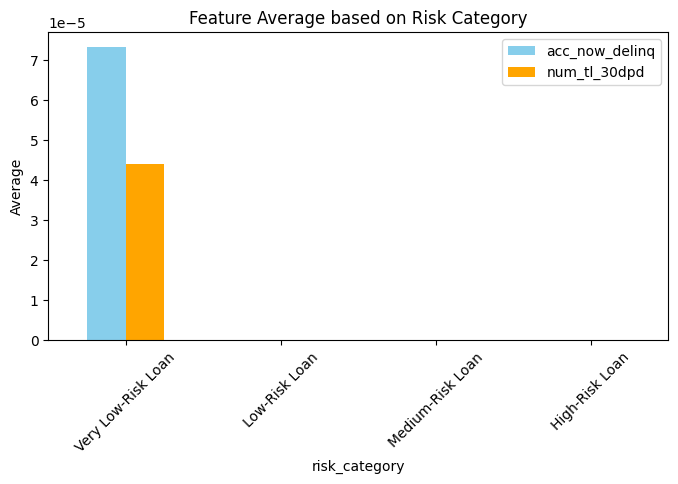

In [5]:
grouped_data = df.groupby('risk_category')[['acc_now_delinq', 'num_tl_30dpd']].mean()
# Bar plot
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']
grouped_data = grouped_data.reindex(risk_order)
grouped_data.plot(kind='bar', figsize=(8, 4), color=['skyblue', 'orange'])
plt.title('Feature Average based on Risk Category')
plt.ylabel('Average')
plt.xticks(rotation=45)
plt.show()

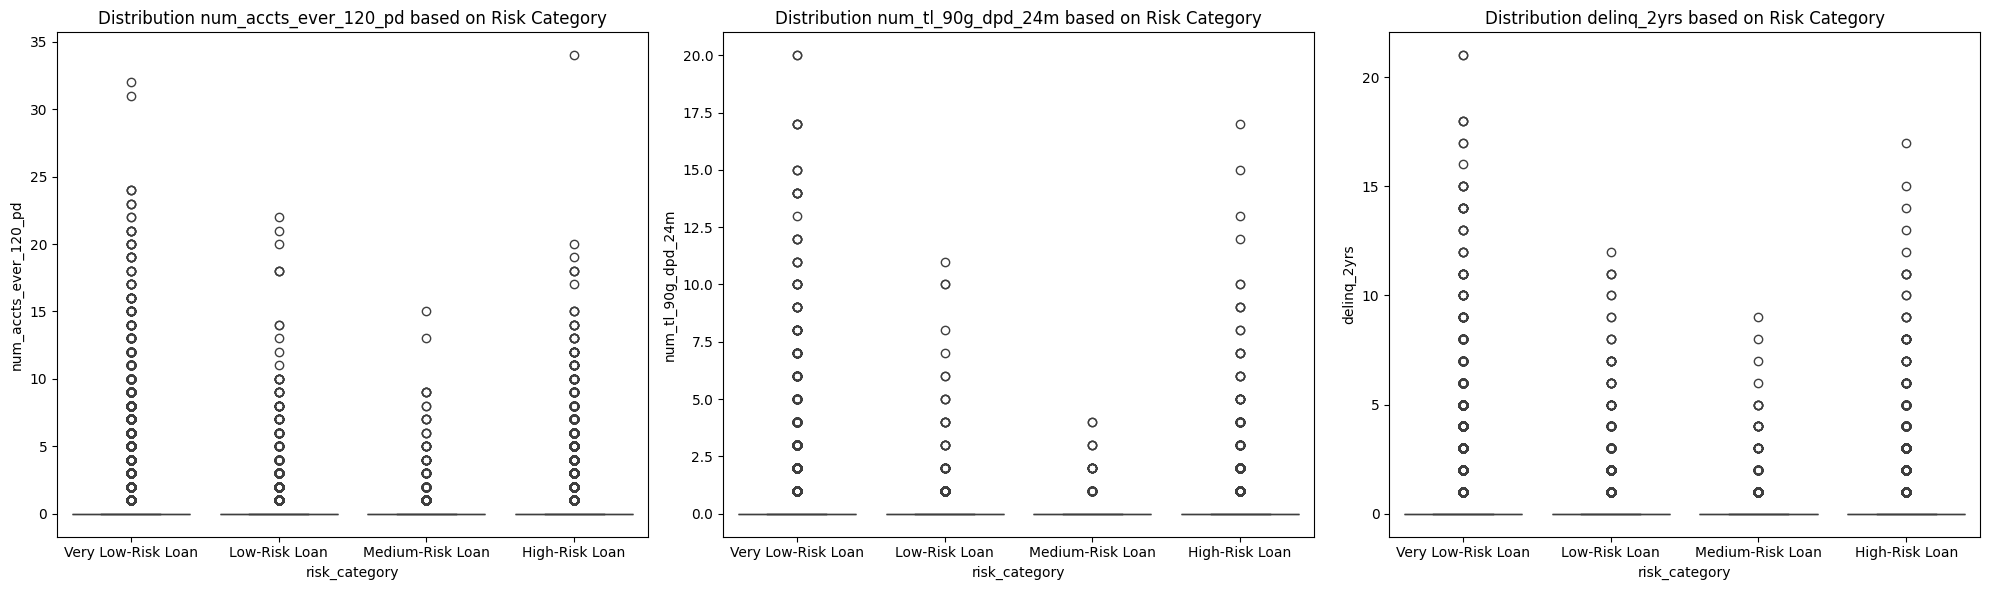

In [6]:
# Boxplot
variables = ['num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'delinq_2yrs']
fig, axs = plt.subplots(1, len(variables), figsize=(20, 6))
for i, var in enumerate(variables):
    sns.boxplot(x='risk_category', y=var, data=df, ax=axs[i], order=risk_order)
    axs[i].set_title(f'Distribution {var} based on Risk Category')
plt.tight_layout()
plt.show()

In [7]:
def outliers(df_out):
    Q1 = df_out.quantile(0.25)
    Q3 = df_out.quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df_out < (Q1 - 1.5 * IQR)) | (df_out > (Q3 + 1.5 * IQR))]
    total_out = (len(outliers) / len(df_out)) * 100
    print("Total Outliers: ", len(outliers))
    print(total_out,"%")
    


In [8]:
outliers(df['num_accts_ever_120_pd'])

Total Outliers:  19410
20.658606156073056 %


In [9]:
outliers(df['num_tl_90g_dpd_24m'])

Total Outliers:  3711
3.9497211460683723 %


In [10]:
outliers(df['delinq_2yrs'])

Total Outliers:  13838
14.728170633062284 %


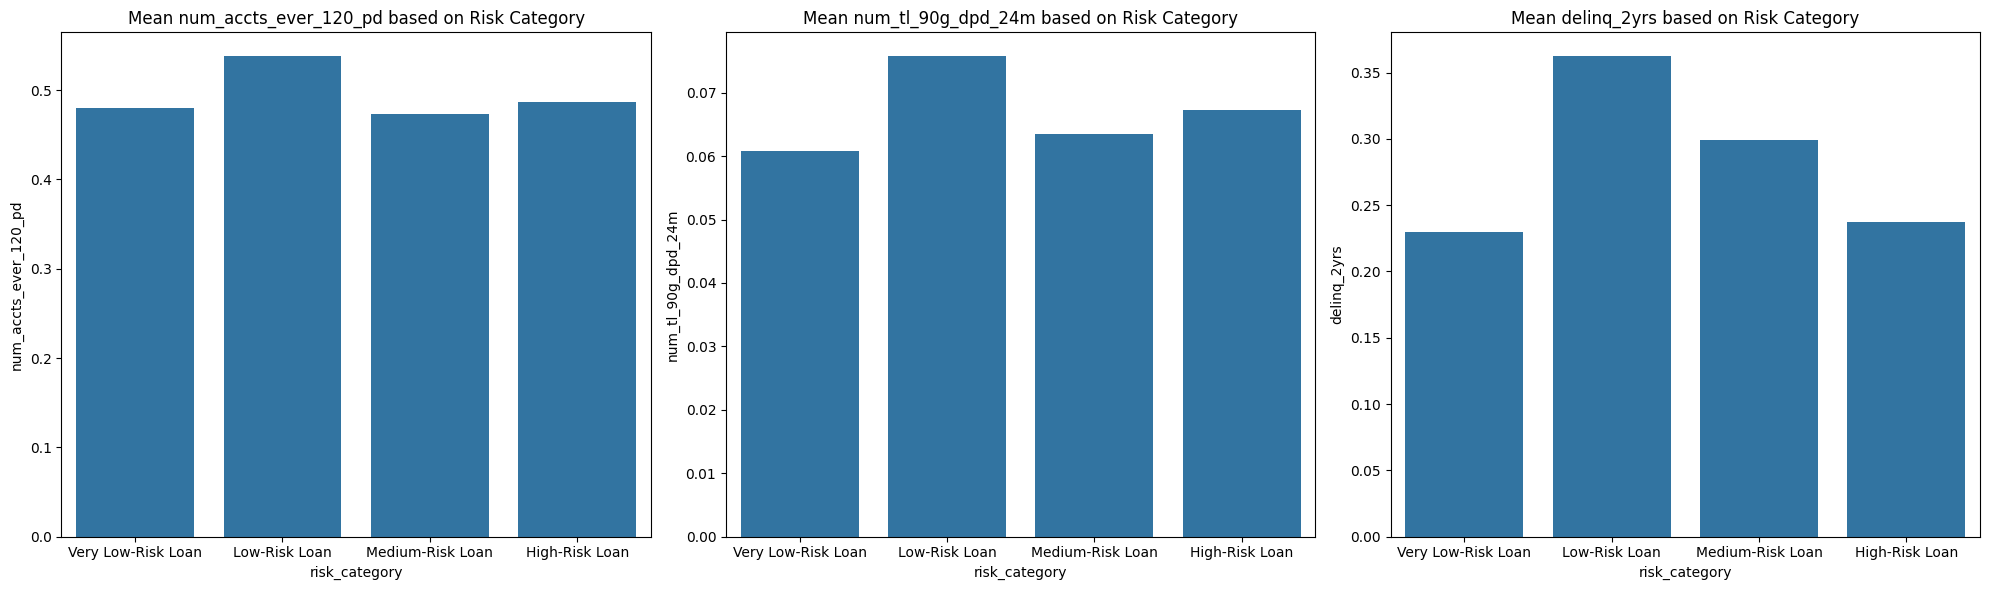

In [11]:
# Bar chart
variables = ['num_accts_ever_120_pd', 'num_tl_90g_dpd_24m', 'delinq_2yrs']
fig, axs = plt.subplots(1, len(variables), figsize=(20, 6))
for i, var in enumerate(variables):
    df_grouped = df.groupby('risk_category')[var].mean().reset_index()
    sns.barplot(x='risk_category', y=var, data=df_grouped, ax=axs[i], order=risk_order)
    axs[i].set_title(f'Mean {var} based on Risk Category')
plt.tight_layout()
plt.show()

/tmp/ipykernel_4396/705764865.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_category', y='delinq_2yrs', data=grouped_data, palette='viridis', order=risk_order)


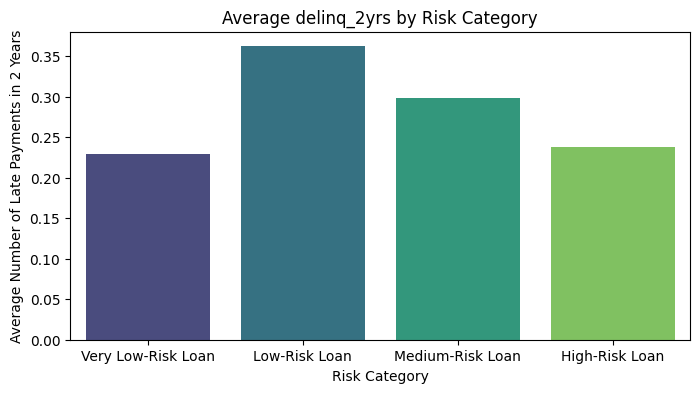

In [21]:
# Calculate delinq_2yrs average based on risk_category
grouped_data = df.groupby('risk_category')['delinq_2yrs'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='delinq_2yrs', data=grouped_data, palette='viridis', order=risk_order)
plt.title('Average delinq_2yrs by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Number of Late Payments in 2 Years')
plt.show()

/tmp/ipykernel_4396/3119311579.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_category', y='pct_tl_nvr_dlq', data=grouped_data, palette='viridis', order=risk_order)


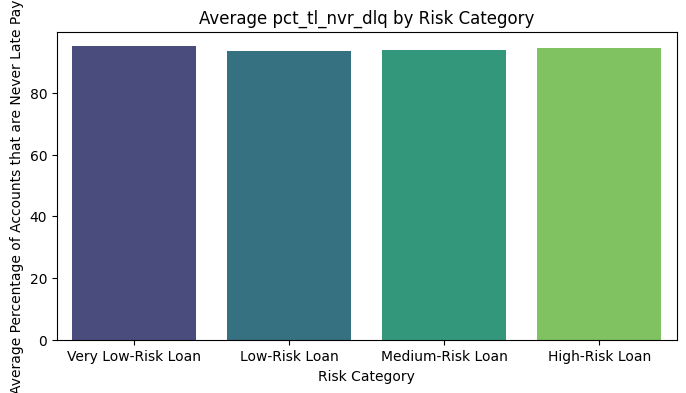

In [22]:
# Calculate the average of pct_tl_nvr_dlq based on risk_category
grouped_data = df.groupby('risk_category')['pct_tl_nvr_dlq'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='pct_tl_nvr_dlq', data=grouped_data, palette='viridis', order=risk_order)
plt.title('Average pct_tl_nvr_dlq by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Percentage of Accounts that are Never Late Paying')
plt.show()

/tmp/ipykernel_4396/1286114241.py:7: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='risk_category', y='revol_delinq_pct', hue='revol_delinq_category', data=df, palette='Set2', order=risk_order, ci=None)


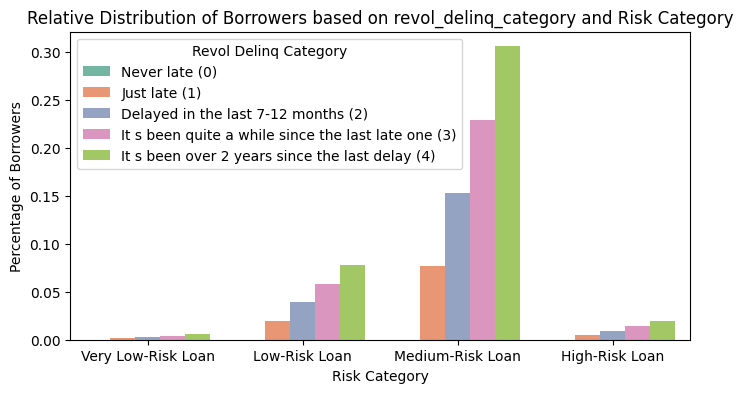

/tmp/ipykernel_4396/1286114241.py:16: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='risk_category', y='bc_delinq_pct', hue='bc_delinq_category', data=df, palette='Set2', order=risk_order, ci=None)


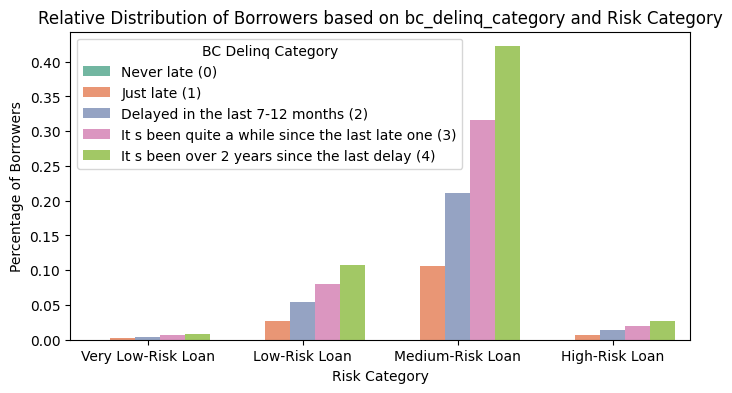

In [28]:
# Calculate relative percentages
df['revol_delinq_pct'] = df.groupby('risk_category')['revol_delinq_category'].transform(lambda x: x / x.sum() * 100)
df['bc_delinq_pct'] = df.groupby('risk_category')['bc_delinq_category'].transform(lambda x: x / x.sum() * 100)

# Grouped bar plot for revol_delinq_category (relative distribution)
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='revol_delinq_pct', hue='revol_delinq_category', data=df, palette='Set2', order=risk_order, ci=None)
plt.title('Relative Distribution of Borrowers based on revol_delinq_category and Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Percentage of Borrowers')
plt.legend(title='Revol Delinq Category', labels=['Never late (0)', 'Just late (1)', 'Delayed in the last 7-12 months (2)', 'It s been quite a while since the last late one (3)', 'It s been over 2 years since the last delay (4)'])
plt.show()

# Grouped bar plot for bc_delinq_category (relative distribution)
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='bc_delinq_pct', hue='bc_delinq_category', data=df, palette='Set2', order=risk_order, ci=None)
plt.title('Relative Distribution of Borrowers based on bc_delinq_category and Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Percentage of Borrowers')
plt.legend(title='BC Delinq Category', labels=['Never late (0)', 'Just late (1)', 'Delayed in the last 7-12 months (2)', 'It s been quite a while since the last late one (3)', 'It s been over 2 years since the last delay (4)'])
plt.show()

/tmp/ipykernel_4396/699625779.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_category', y='delinq_amnt', data=grouped_data, palette='viridis', order=risk_order)


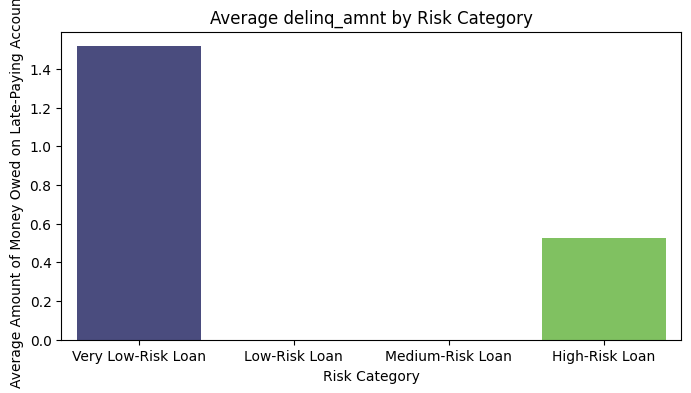

In [24]:
# Calculate the average delinq_amnt based on risk_category
grouped_data = df.groupby('risk_category')['delinq_amnt'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='delinq_amnt', data=grouped_data, palette='viridis', order=risk_order)
plt.title('Average delinq_amnt by Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Amount of Money Owed on Late-Paying Accounts')
plt.show()

## 2. Credit Utilization & Debt Burden

In [3]:
df[['all_util', 'bc_util', 'dti', 'percent_bc_gt_75', 'revol_util']].describe(include="all")

,all_util,bc_util,dti,percent_bc_gt_75,revol_util
count,93956.000000,93956.000000,93956.000000,93956.000000,93956
unique,NaN,NaN,NaN,NaN,1065
top,NaN,NaN,NaN,NaN,0%
freq,NaN,NaN,NaN,NaN,1448
mean,53.225765,44.314556,19.823401,28.487978,NaN
std,21.332982,29.759212,20.770354,33.467700,NaN
min,0.000000,0.000000,0.000000,0.000000,NaN
25%,39.000000,19.000000,11.520000,0.000000,NaN
50%,54.000000,41.200000,17.880000,16.700000,NaN
75%,68.000000,68.500000,25.240000,50.000000,NaN


In [4]:
df['revol_util'] = df['revol_util'].str.replace('%','').astype(float)
df[['revol_util']].dtypes

revol_util    float64
dtype: object

In [11]:
df[['all_util', 'bc_util', 'dti', 'percent_bc_gt_75', 'revol_util']].describe()

,all_util,bc_util,dti,percent_bc_gt_75,revol_util
count,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000
mean,53.225765,44.314556,19.823401,28.487978,40.373856
std,21.332982,29.759212,20.770354,33.467700,25.528020
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.000000,19.000000,11.520000,0.000000,19.600000
50%,54.000000,41.200000,17.880000,16.700000,37.400000
75%,68.000000,68.500000,25.240000,50.000000,58.900000
max,204.000000,169.500000,999.000000,100.000000,129.000000


In [11]:
# List of variables to plot
variables = ['all_util', 'bc_util', 'dti', 'percent_bc_gt_75', 'revol_util']
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

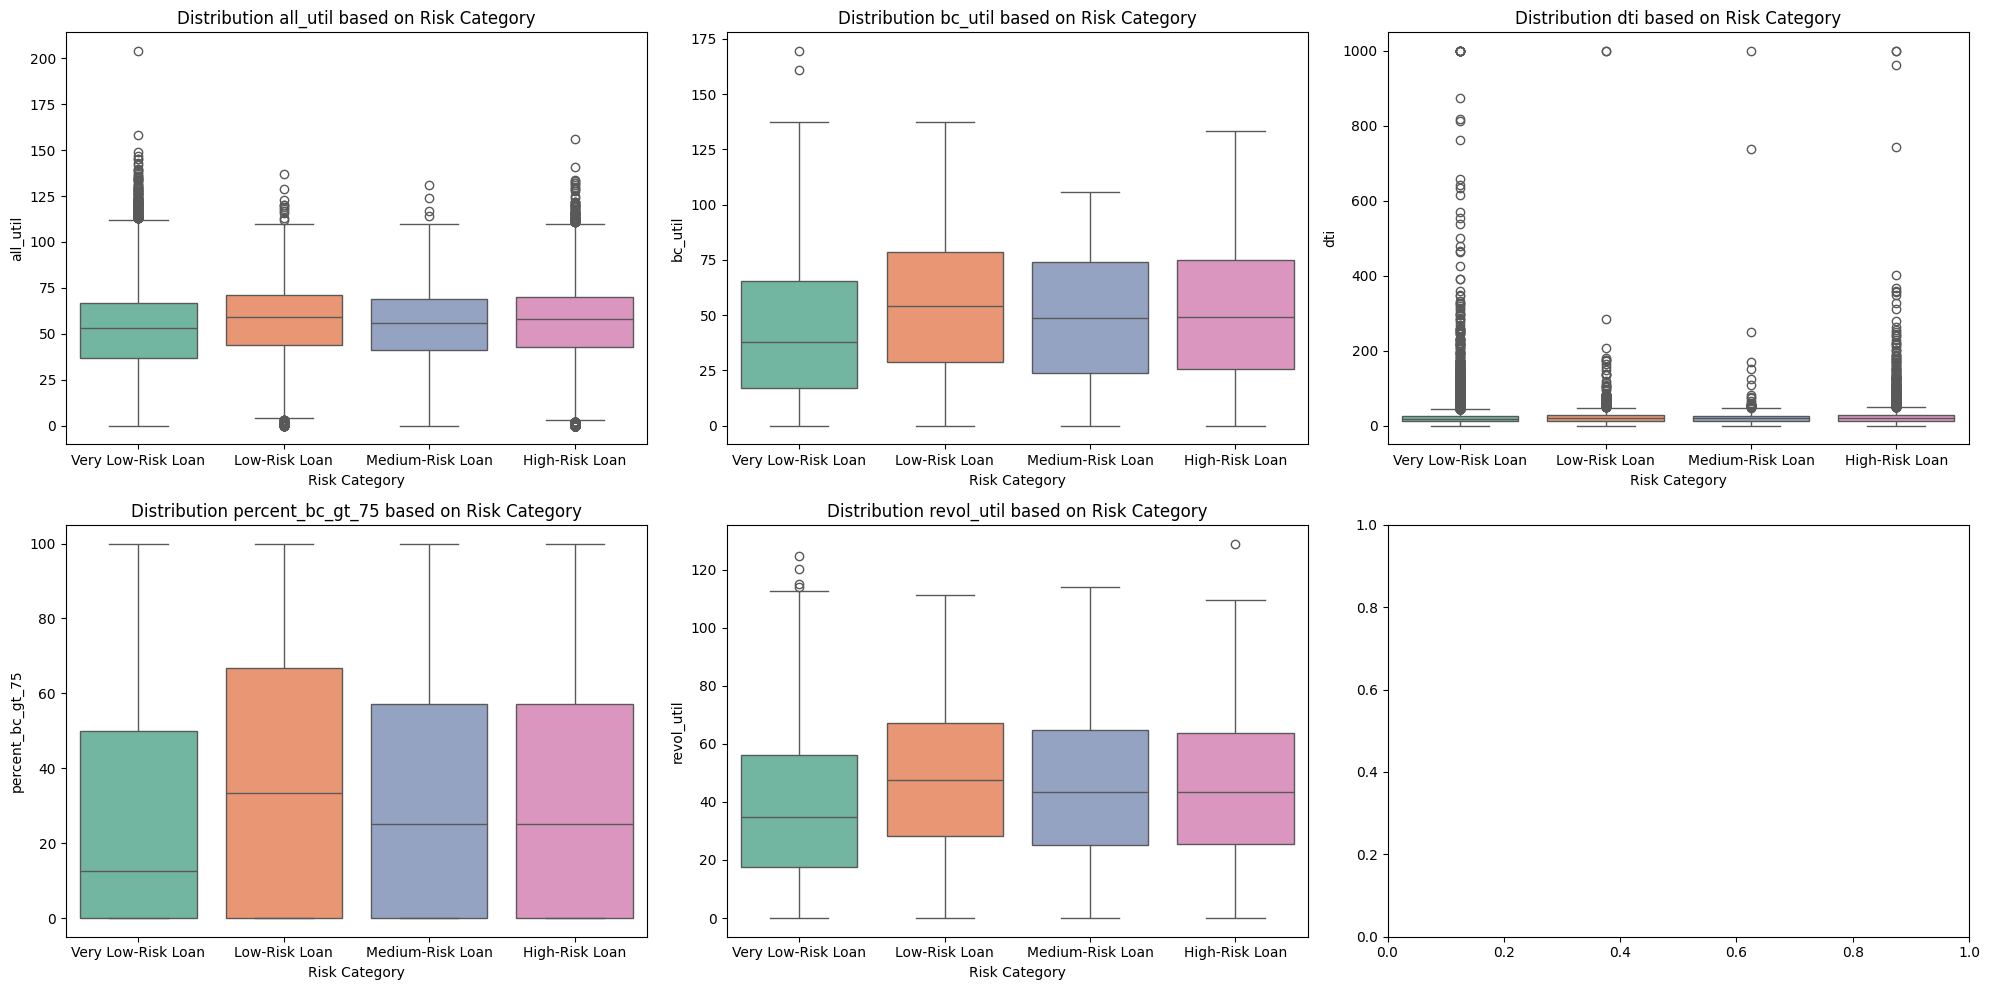

In [17]:
# Create figures with subplots
fig, axs = plt.subplots(2, len(variables)//2 + len(variables)%2, figsize=(20, 10))
# Loop to plot each variable
for i, var in enumerate(variables):
    sns.boxplot(x='risk_category', y=var, data=df, palette='Set2', ax=axs[i//3, i%3], order=risk_order)
    axs[i//3, i%3].set_title(f'Distribution {var} based on Risk Category')
    axs[i//3, i%3].set_xlabel('Risk Category')
    axs[i//3, i%3].set_ylabel(f'{var}')

# Show plots
plt.tight_layout()
plt.show()

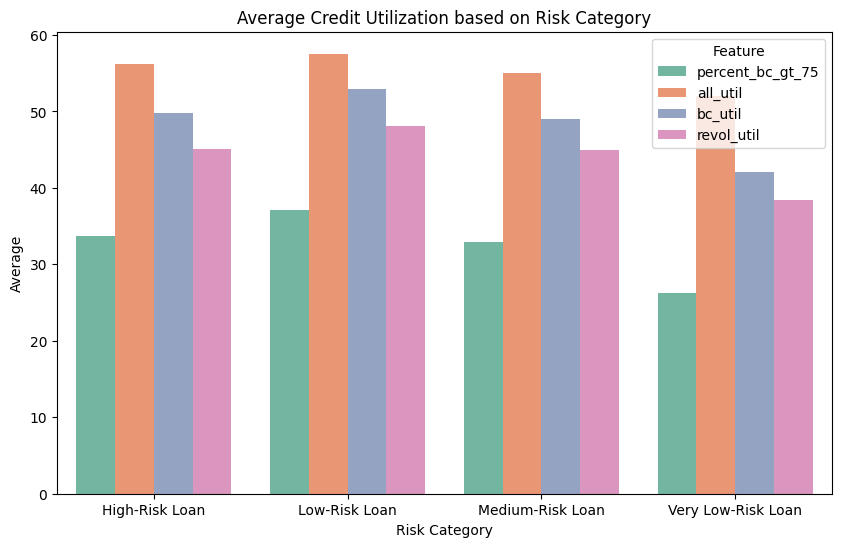

In [8]:
# Calculate the average of percent_bc_gt_75, all_util, bc_util, and revol_util based on risk_category
grouped_data = df.groupby('risk_category')[['percent_bc_gt_75', 'all_util', 'bc_util', 'revol_util']].mean().reset_index()

# Grouped bar plot
grouped_data_melted = grouped_data.melt(id_vars='risk_category', var_name='Fitur', value_name='Rata-rata')

plt.figure(figsize=(10, 6))
sns.barplot(x='risk_category', y='Rata-rata', hue='Fitur', data=grouped_data_melted, palette='Set2')
plt.title('Average Credit Utilization based on Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average')
plt.legend(title='Feature')
plt.show()

/tmp/ipykernel_4549/2659488964.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='risk_category', y='dti', data=grouped_data, palette='viridis', order=risk_order)


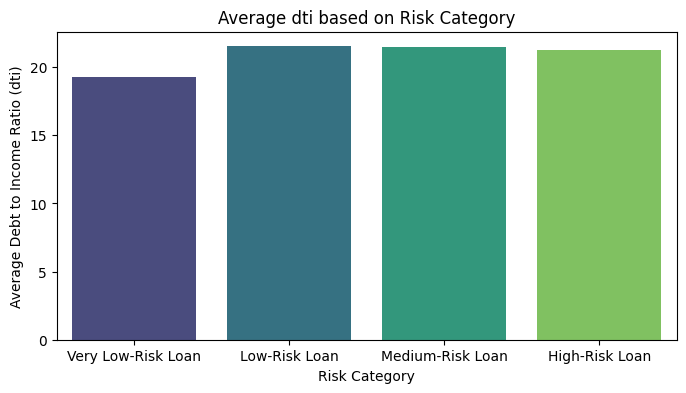

In [9]:
# Calculate average dti based on risk_category
grouped_data = df.groupby('risk_category')['dti'].mean().reset_index()

# Bar plot
plt.figure(figsize=(8, 4))
sns.barplot(x='risk_category', y='dti', data=grouped_data, palette='viridis', order=risk_order)
plt.title('Average dti based on Risk Category')
plt.xlabel('Risk Category')
plt.ylabel('Average Debt to Income Ratio (dti)')
plt.show()

## 3. Creditworthiness & Loan Terms

In [ ]:
df[['fico_range_high', 'fico_range_low', 'int_rate']].describe(include='all')

,fico_range_high,fico_range_low,int_rate,loan_status
count,93956.000000,93956.000000,93956,93956
unique,NaN,NaN,78,7
top,NaN,NaN,8.19%,Fully Paid
freq,NaN,NaN,6662,66068
mean,712.475914,708.475563,NaN,NaN
std,36.730293,36.728983,NaN,NaN
min,664.000000,660.000000,NaN,NaN
25%,684.000000,680.000000,NaN,NaN
50%,704.000000,700.000000,NaN,NaN
75%,734.000000,730.000000,NaN,NaN


In [3]:
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)
df[['int_rate']].dtypes

int_rate    float64
dtype: object

In [4]:
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

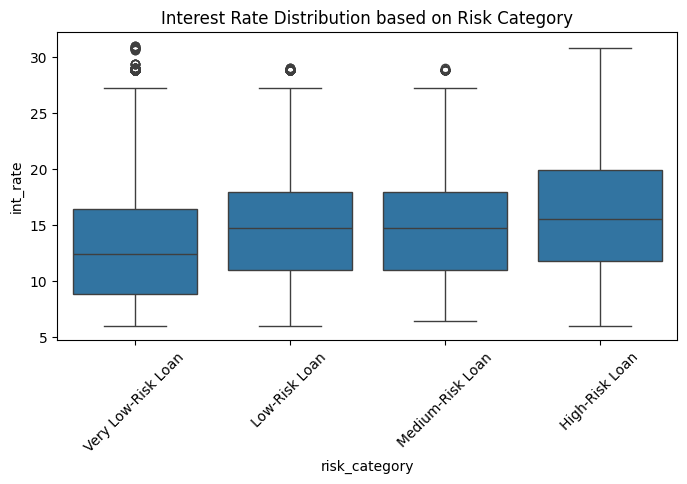

In [ ]:
# Boxplot untuk int_rate berdasarkan risk_category
plt.figure(figsize=(8, 4))
sns.boxplot(x="risk_category", y="int_rate", data=df, order=risk_order)
plt.xticks(rotation=45)
plt.title("Interest Rate Distribution based on Risk Category")
plt.savefig("./results/int_rate_boxplot.png")
plt.show()

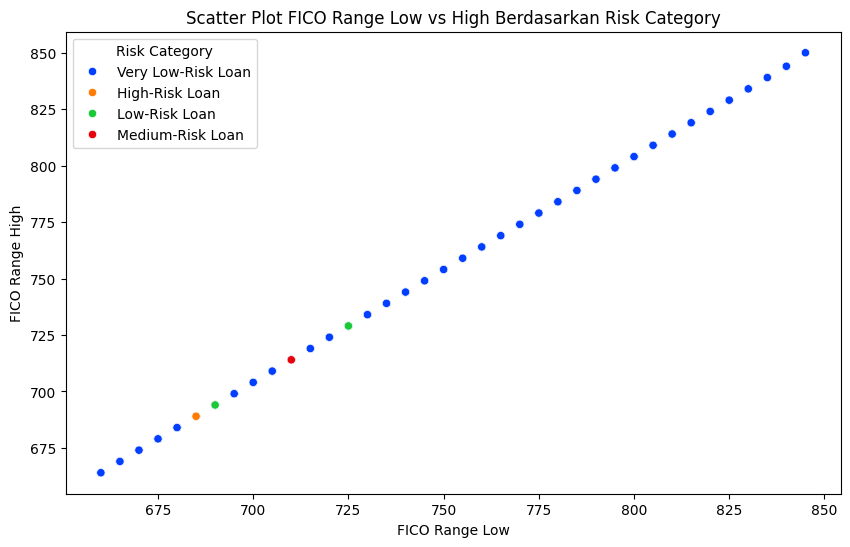

In [30]:
# Scatter plot for fico
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='fico_range_low', y='fico_range_high', hue='risk_category', palette='bright')
plt.title('Scatter Plot FICO Range Low vs High Berdasarkan Risk Category')
plt.xlabel('FICO Range Low')
plt.ylabel('FICO Range High')
plt.legend(title='Risk Category')
plt.show()

In [25]:
# Function to categorize risks
def categorize_risk(score):
    if score < 580:
        return 'Poor'
    elif 580 <= score < 670:
        return 'Fair'
    elif 670 <= score < 740:
        return 'Good'
    elif 740 <= score < 800:
        return 'Very Good'
    else:
        return 'Excellent'


In [33]:
# Apply the function to the fico_range_low and fico_range_high columns
df['fico_category_low'] = df['fico_range_low'].apply(categorize_risk)
df['fico_category_high'] = df['fico_range_high'].apply(categorize_risk)

In [ ]:
# Cross-tabulation for fico_category_low and risk_category
cross_tab_low = pd.crosstab(df['risk_category'],df['fico_category_low'])
# Cross-tabulation for fico_category_high and risk_category
cross_tab_high = pd.crosstab(df['risk_category'],df['fico_category_high'])
# Calculate the relative proportion for fico_category_low
prop_low = cross_tab_low.div(cross_tab_low.sum(axis=1), axis=0)
# Calculate the relative proportion for fico_category_high
prop_high = cross_tab_high.div(cross_tab_high.sum(axis=1), axis=0)

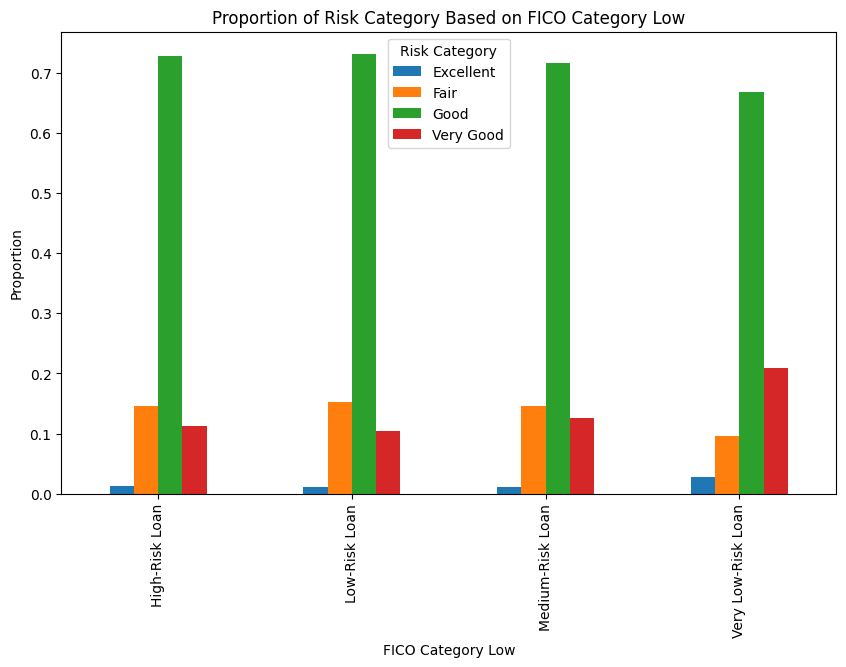

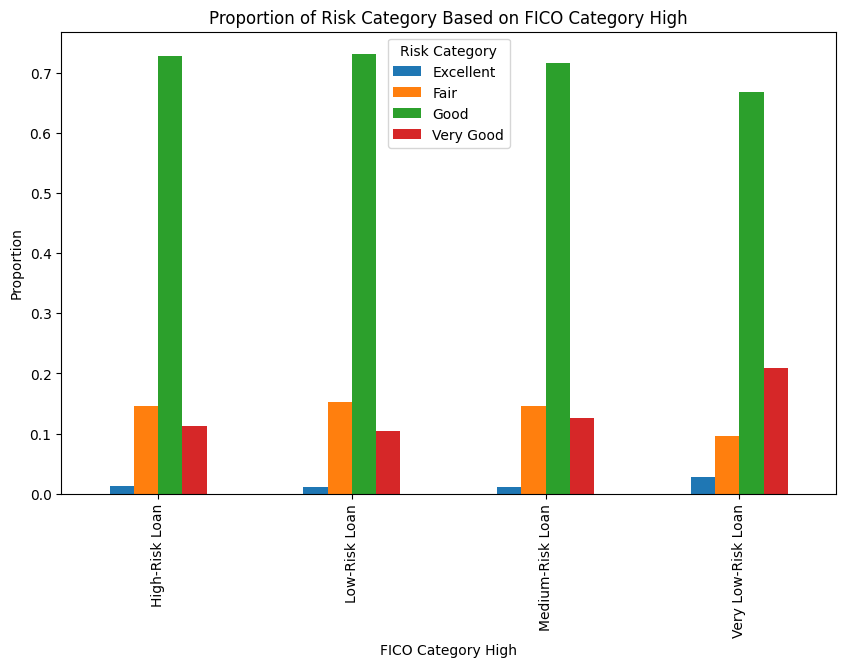

In [40]:
# Grouped bar plot for fico_category_low
prop_low.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Risk Category Based on FICO Category Low')
plt.xlabel('FICO Category Low')
plt.ylabel('Proportion')
plt.legend(title='Risk Category')
plt.show()

# Grouped bar plot untuk fico_category_high
prop_high.plot(kind='bar', figsize=(10, 6))
plt.title('Proportion of Risk Category Based on FICO Category High')
plt.xlabel('FICO Category High')
plt.ylabel('Proportion')
plt.legend(title='Risk Category')
plt.show()

## 4. Credit History Age

In [6]:
df[['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl']].describe()

,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl
count,93956.000000,93956.000000,93956.000000,93956.000000
mean,121.198625,171.023383,14.286134,7.436002
std,58.970473,97.457440,17.779018,8.055490
min,0.000000,3.000000,0.000000,0.000000
25%,81.000000,99.000000,4.000000,3.000000
50%,129.000000,154.000000,8.000000,5.000000
75%,156.000000,220.000000,18.000000,9.000000
max,564.000000,909.000000,355.000000,290.000000


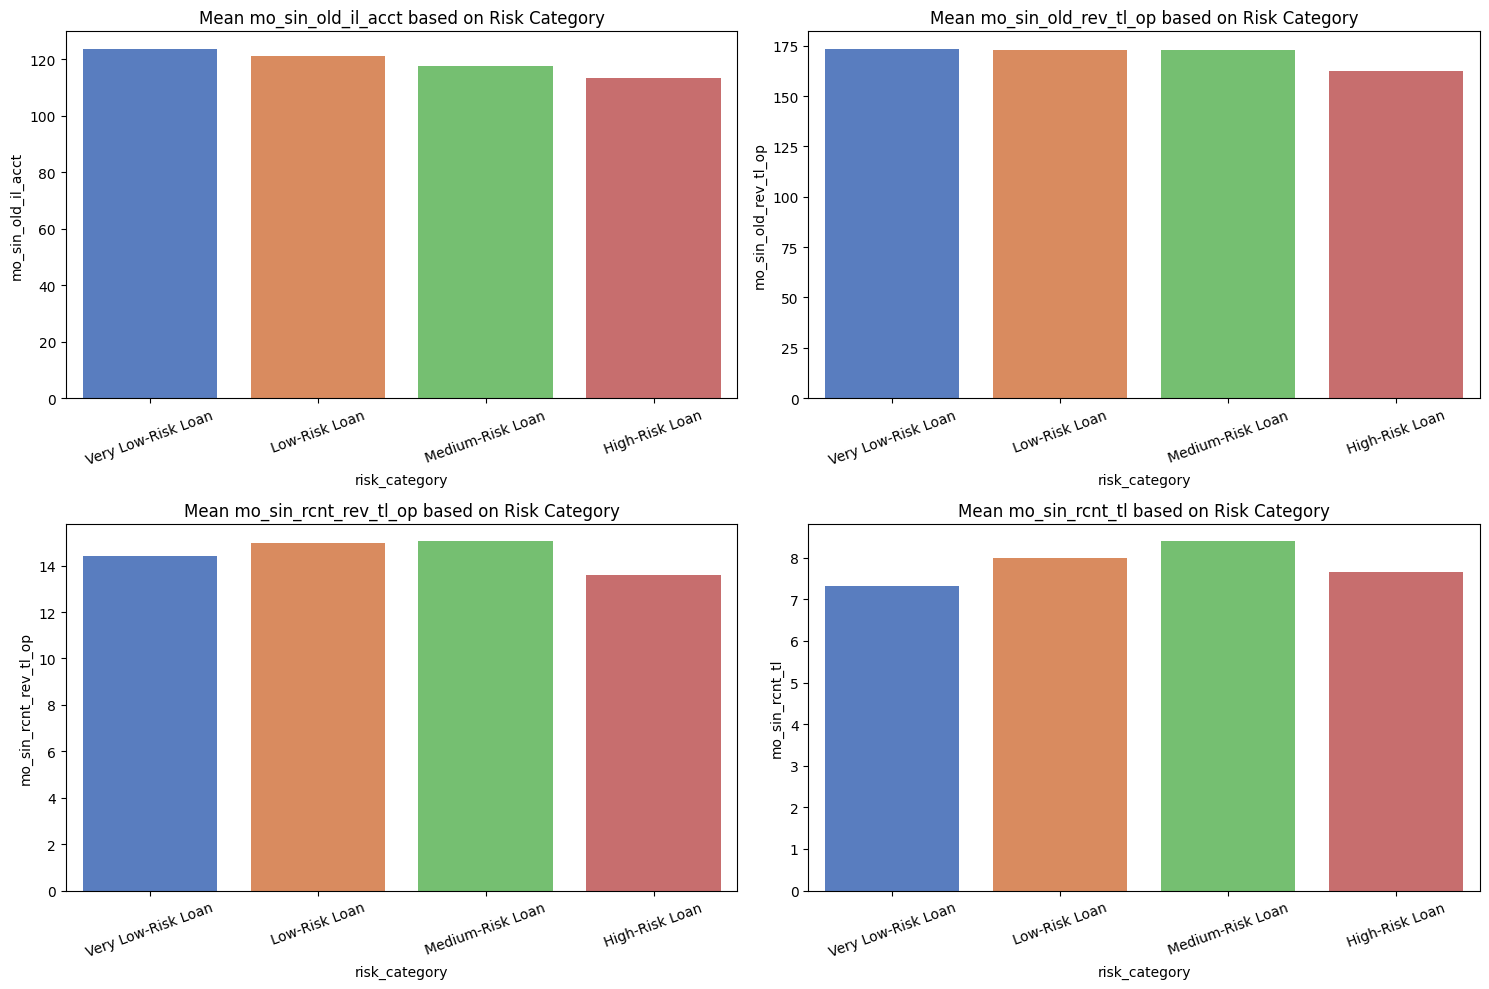

In [ ]:
# Set figure size
plt.figure(figsize=(15, 10))

# Features to be visualized
features = ["mo_sin_old_il_acct", "mo_sin_old_rev_tl_op", "mo_sin_rcnt_rev_tl_op", "mo_sin_rcnt_tl"]
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

i = 1
for feature in features:
    plt.subplot(2, 2, i)
    sns.barplot(x='risk_category', y=feature, data=df, estimator=np.mean, ci=None, palette='muted', order=risk_order)
    plt.xticks(rotation=20)
    plt.title(f'Mean {feature} based on Risk Category')
    i += 1

plt.tight_layout()
plt.show()

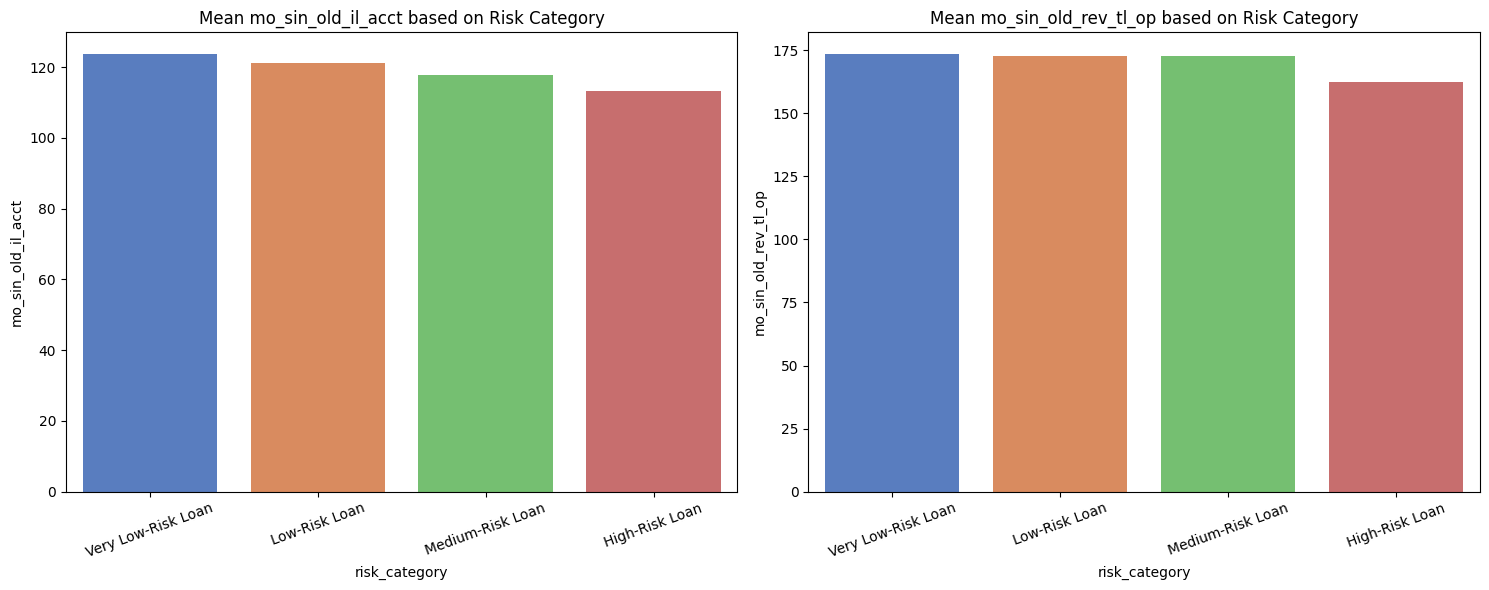

In [13]:
# Set figure size
plt.figure(figsize=(15, 6))

# Features to be visualized
features = ["mo_sin_old_il_acct", "mo_sin_old_rev_tl_op"]
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

i = 1
for feature in features:
    plt.subplot(1, 2, i)
    sns.barplot(x='risk_category', y=feature, data=df, estimator=np.mean, ci=None, palette='muted', order=risk_order)
    plt.xticks(rotation=20)
    plt.title(f'Mean {feature} based on Risk Category')
    i += 1

plt.tight_layout()
plt.savefig("./results/account_age.png")
plt.show()

## 5. Credit Account Metrics

In [17]:
# Features to be analyzed
features = ["mort_acc", "num_actv_bc_tl", "num_actv_rev_tl", "num_bc_sats",
            "num_bc_tl", "num_il_tl", "num_op_rev_tl", "num_rev_accts", "num_tl_op_past_12m", "num_sats"]
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

In [18]:
df[features].describe()

,mort_acc,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_tl_op_past_12m,num_sats
count,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000,93956.000000
mean,1.518115,3.478298,5.130902,4.982141,7.478341,9.349972,8.252171,13.570214,2.399059,11.700796
std,1.827923,2.404045,3.341231,3.298623,4.799510,7.790311,5.025197,8.337087,2.037605,5.964644
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,0.000000,2.000000,3.000000,3.000000,4.000000,4.000000,5.000000,8.000000,1.000000,8.000000
50%,1.000000,3.000000,4.000000,4.000000,6.000000,7.000000,7.000000,12.000000,2.000000,11.000000
75%,2.000000,5.000000,7.000000,6.000000,10.000000,12.000000,11.000000,17.000000,3.000000,15.000000
max,20.000000,50.000000,58.000000,53.000000,89.000000,90.000000,78.000000,122.000000,19.000000,84.000000


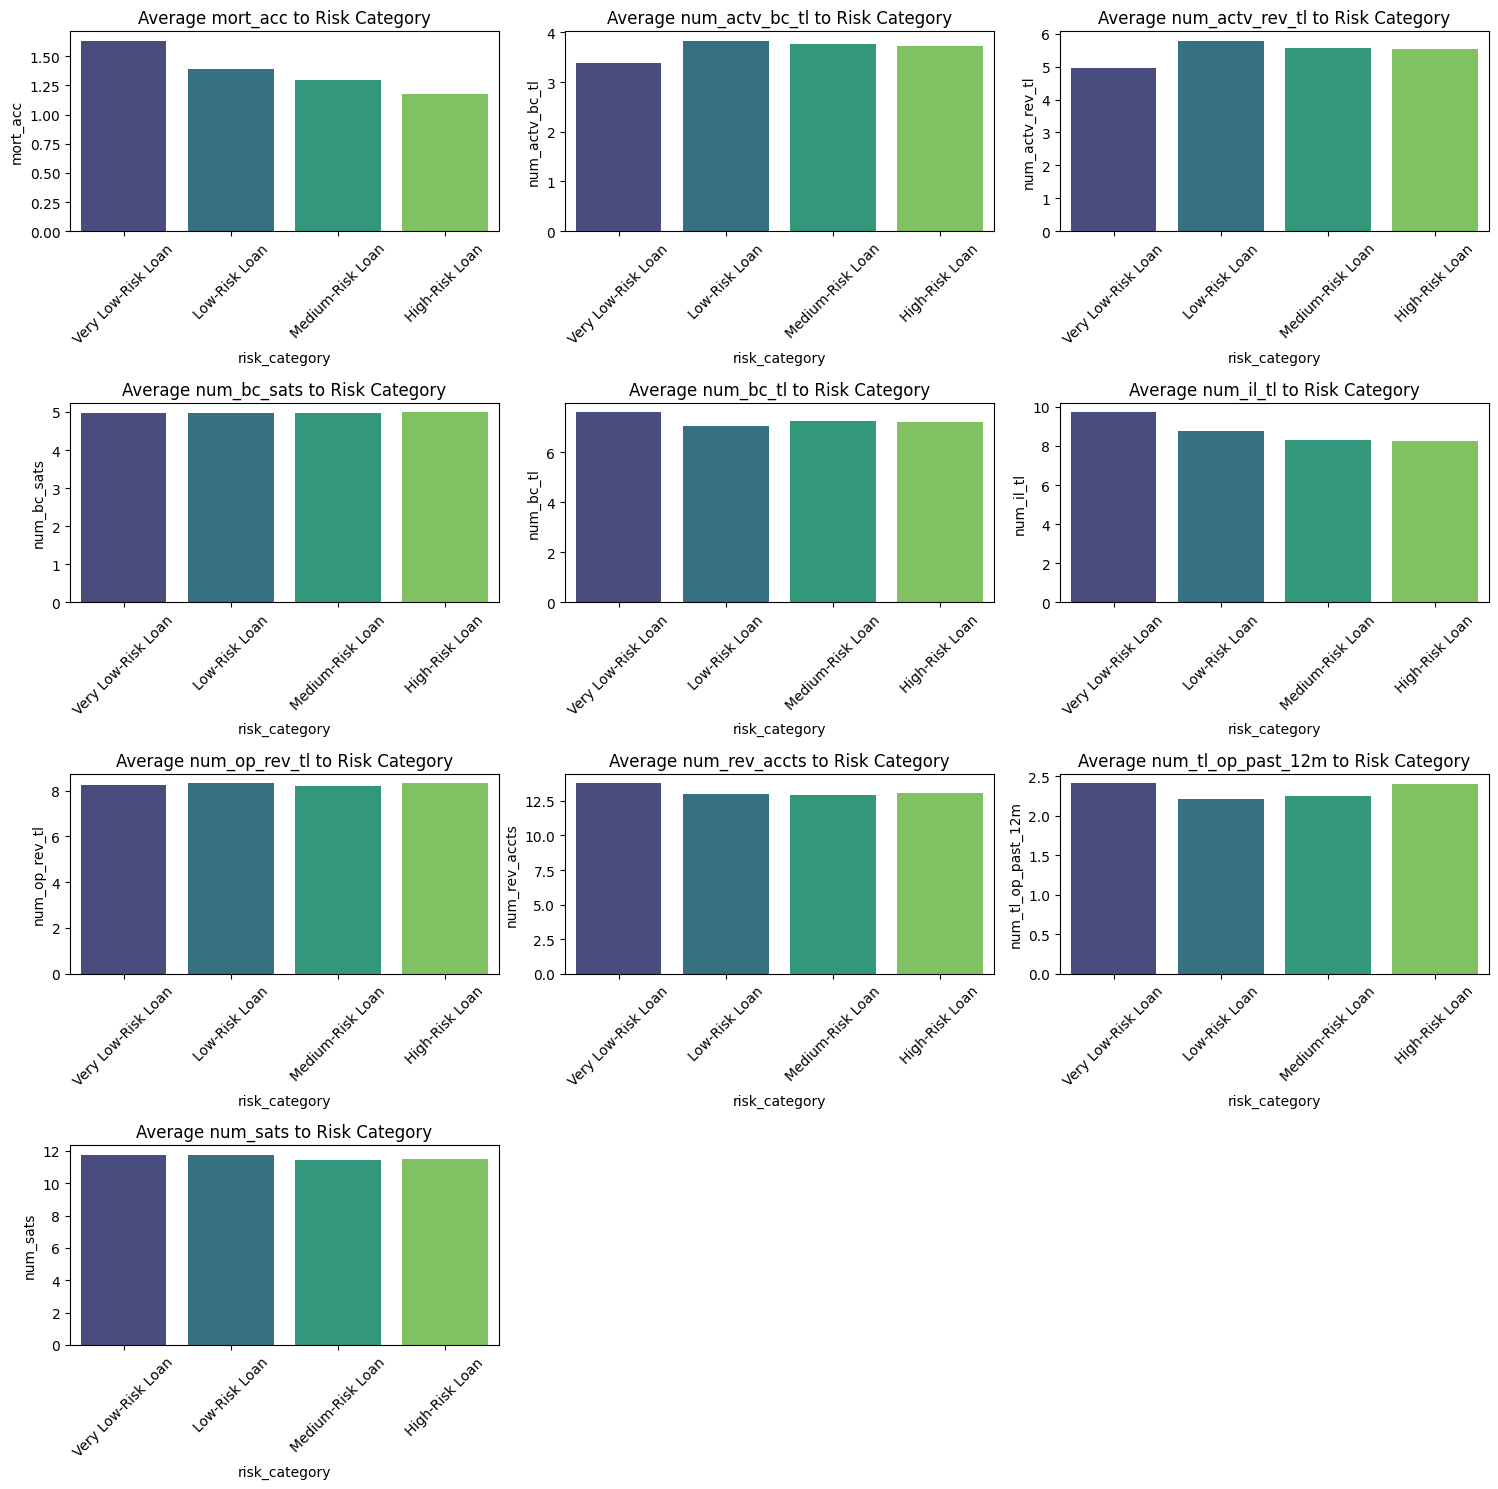

In [ ]:
# Plot size
plt.figure(figsize=(15, 15))

# Loop to create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(4, 3, i)  # 4 rows, 3 columns
    sns.barplot(x="risk_category", y=feature, data=df, estimator=lambda x: x.mean(), ci=None, palette="viridis", order=risk_order)
    plt.xticks(rotation=45)
    plt.title(f"Average {feature} to Risk Category")

plt.tight_layout()
plt.show()

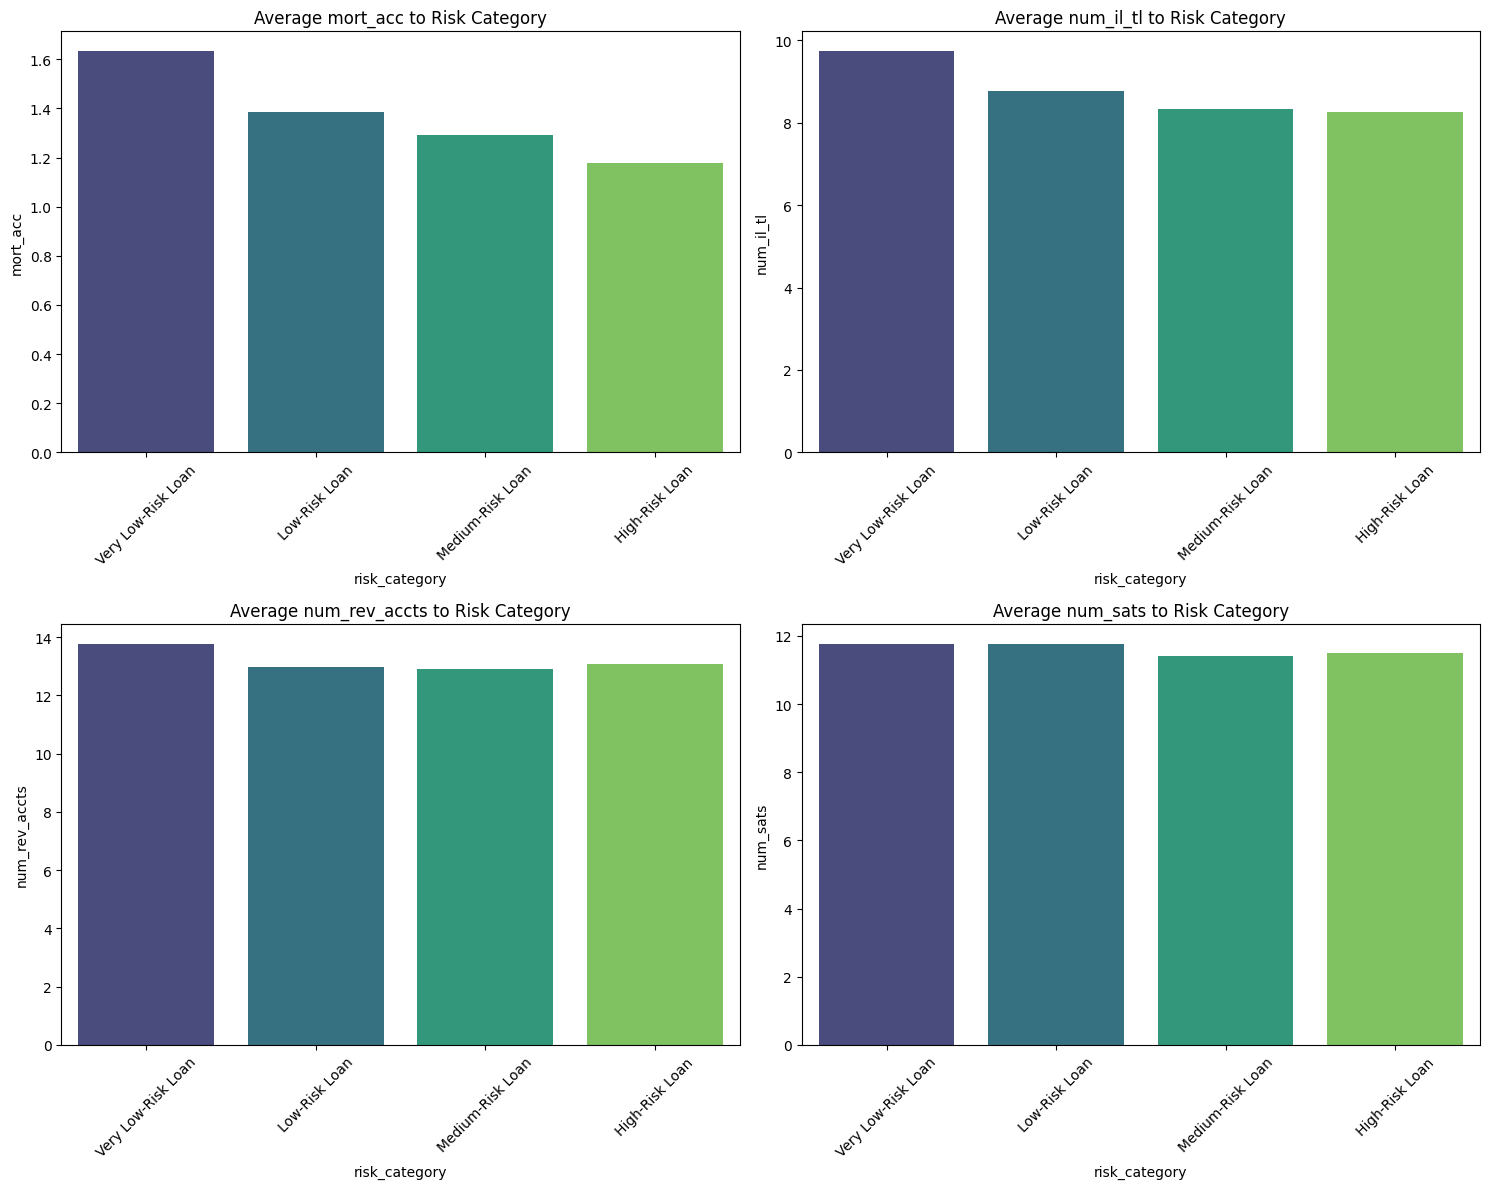

In [18]:
features = ["mort_acc","num_il_tl","num_rev_accts","num_sats"]
# Plot size
plt.figure(figsize=(15, 12))

# Loop to create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)  # 4 rows, 3 columns
    sns.barplot(x="risk_category", y=feature, data=df, estimator=lambda x: x.mean(), ci=None, palette="viridis", order=risk_order)
    plt.xticks(rotation=45)
    plt.title(f"Average {feature} to Risk Category")

plt.tight_layout()
plt.savefig("./results/account_metrics.png")
plt.show()

## 6. Total Balance & Credit Limit

In [3]:
# features that will be used for analysis
features = ['revol_bal', 'total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_bal_il', 'total_rev_hi_lim']
df[features].describe()

,revol_bal,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_bal_il,total_rev_hi_lim
count,93956.000000,9.395600e+04,9.395600e+04,9.395600e+04,9.395600e+04,9.395600e+04
mean,16206.141066,5.613994e+04,2.887534e+04,4.983873e+04,3.961803e+04,4.145265e+04
std,23448.238469,5.603298e+04,2.780361e+04,5.035296e+04,4.795038e+04,3.951287e+04
min,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,4910.000000,2.172900e+04,1.050000e+04,1.706100e+04,1.038975e+04,1.760000e+04
50%,10326.000000,4.097100e+04,2.080000e+04,3.743300e+04,2.632200e+04,3.100000e+04
75%,19397.000000,7.157575e+04,3.820000e+04,6.715025e+04,5.153625e+04,5.260000e+04
max,866850.000000,1.357906e+06,1.058000e+06,1.650162e+06,1.101056e+06,1.571800e+06


In [4]:
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']

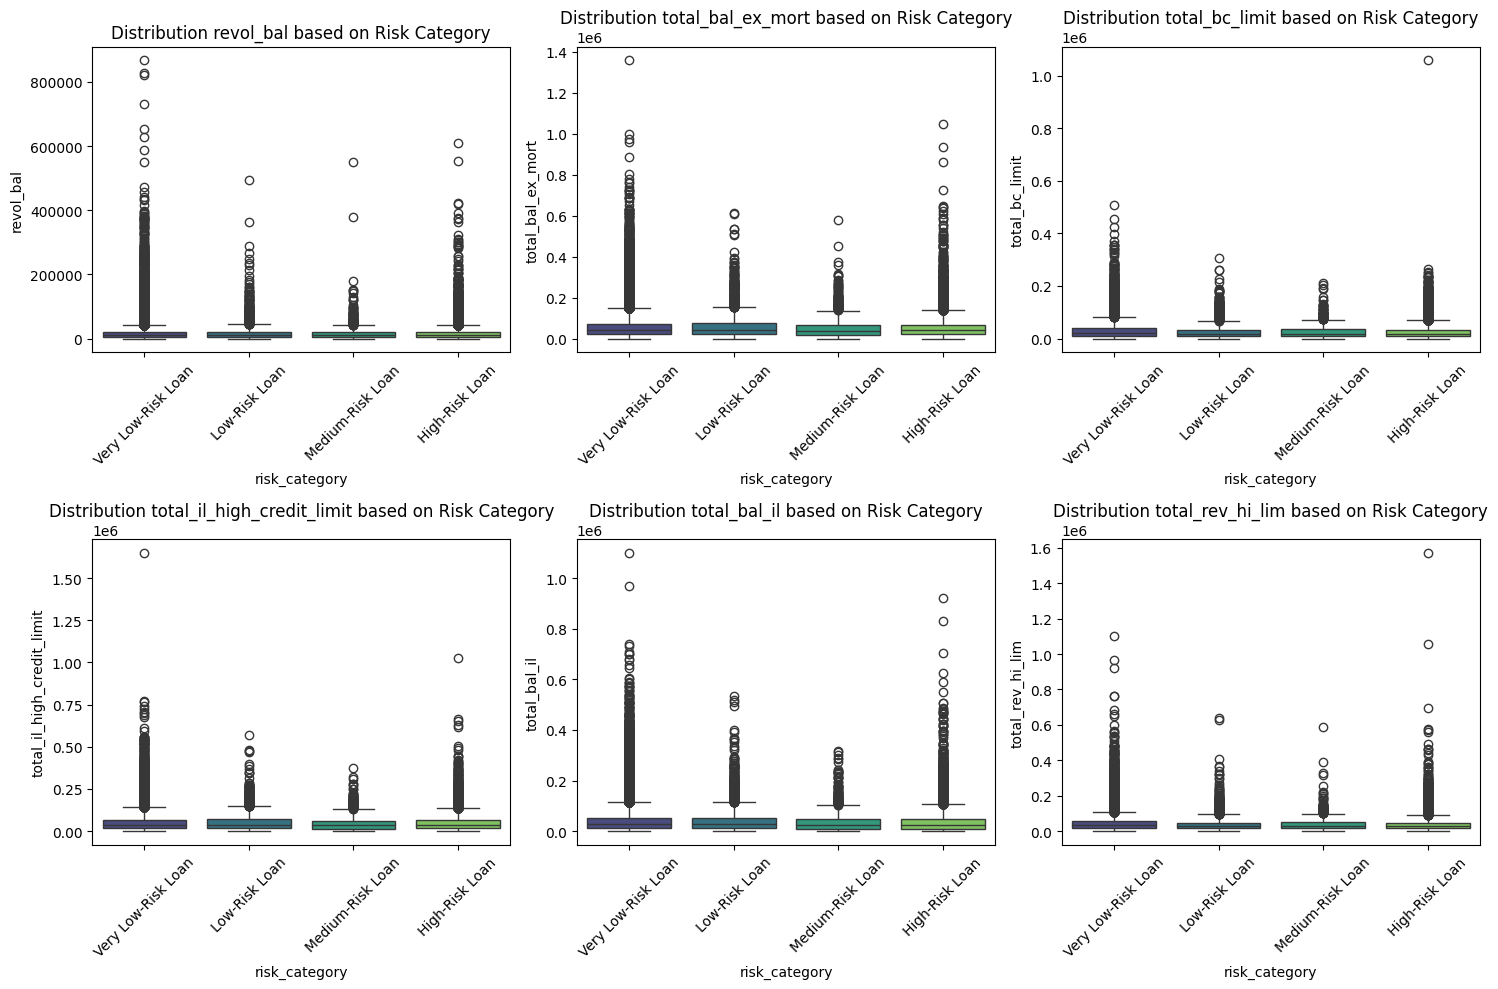

In [7]:
# Plot size
plt.figure(figsize=(15, 10))

# Loop to create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)  # 4 rows, 3 columns
    sns.boxplot(x='risk_category', y=feature, data=df, palette='viridis', order=risk_order)
    plt.xticks(rotation=45)
    plt.title(f"Distribution {feature} based on Risk Category")

plt.tight_layout()
plt.savefig("balance_and_credit_boxplot.png")
plt.show()

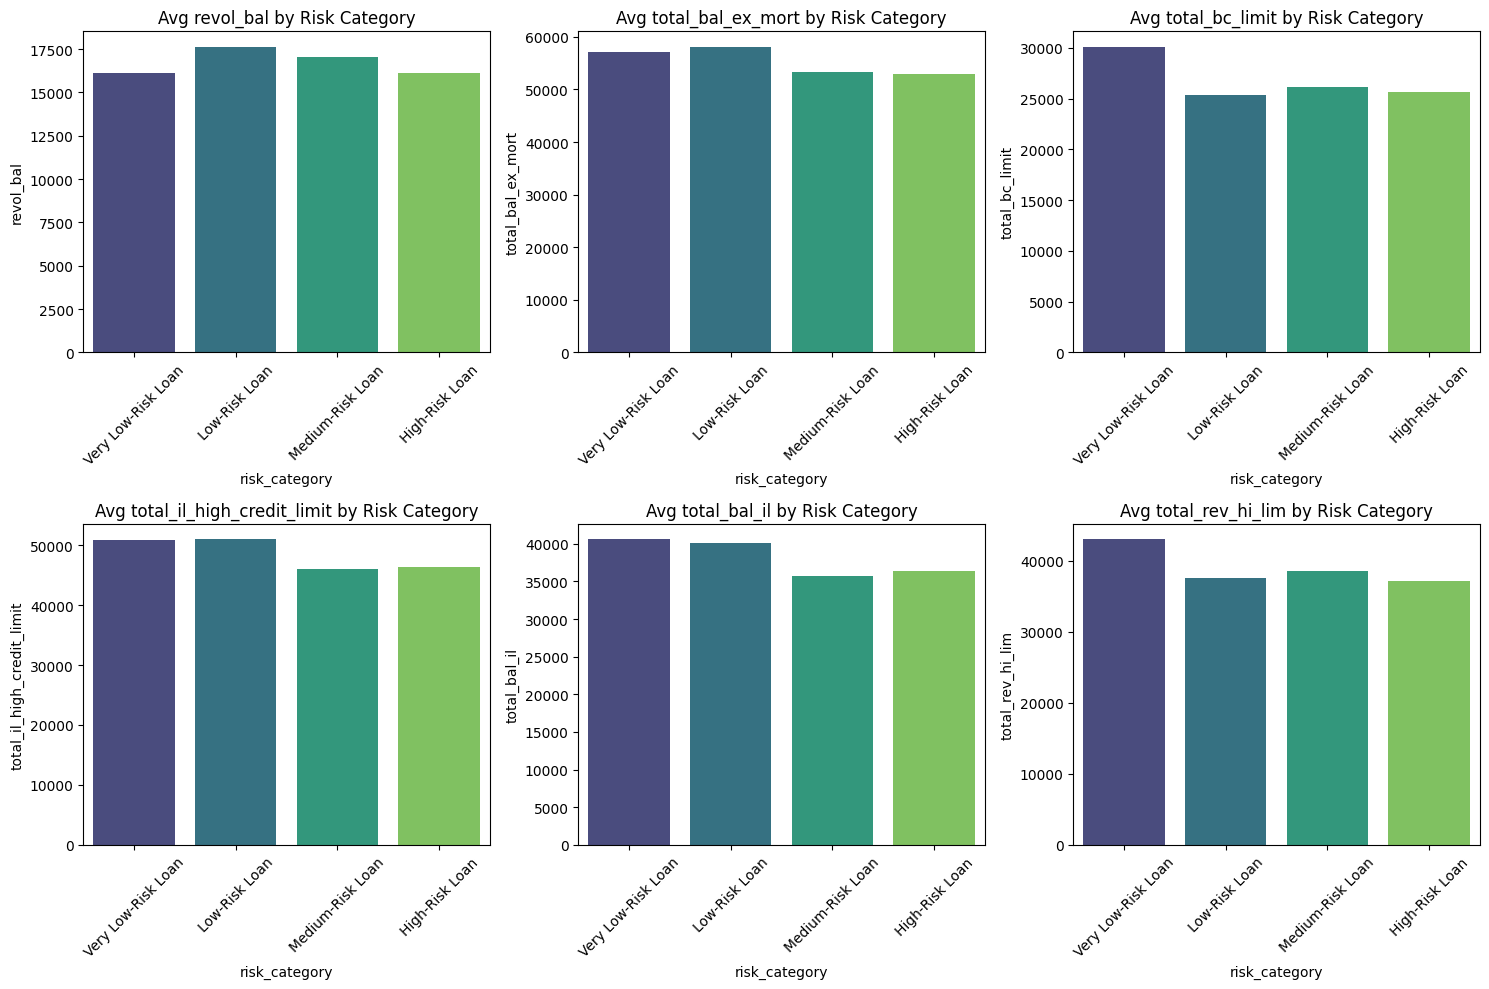

In [6]:
# Plot size
plt.figure(figsize=(15, 10))
# Loop to create subplots
for i, feature in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.barplot(x="risk_category", y=feature, data=df, estimator='mean', ci=None, palette="viridis", order=risk_order)
    plt.xticks(rotation=45)
    plt.title(f"Avg {feature} by Risk Category")

plt.tight_layout()
plt.savefig("./results/balance_and_credit.png")
plt.show()

# 4. Statistical testing

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_risk_category.pkl', 'rb') as file:
    df = pickle.load(file)

In [9]:
from scipy.stats import shapiro, levene, kruskal, spearmanr
import scikit_posthocs as sp

## 1. Interest Rate

In [43]:
# Normality Test (Shapiro-Wilk)
for category in df['risk_category'].unique():
    stat, p = shapiro(df[df['risk_category'] == category]['int_rate'])
    print(f"Shapiro-Wilk Test for {category}: p-value = {p:.4f}")

# Homogeneity of Variance Test (Levene's Test)
groups = [group['int_rate'].values for name, group in df.groupby('risk_category')]
levene_stat, levene_p = levene(*groups)
print(f"\nLevene’s Test: p-value = {levene_p:.4f}")

Shapiro-Wilk Test for Very Low-Risk Loan: p-value = 0.0000
Shapiro-Wilk Test for High-Risk Loan: p-value = 0.0000
Shapiro-Wilk Test for Low-Risk Loan: p-value = 0.0000
Shapiro-Wilk Test for Medium-Risk Loan: p-value = 0.0000

Levene’s Test: p-value = 0.0000


In [44]:
# Divide data by risk category
very_low_risk = df[df['risk_category'] == 'Very Low-Risk Loan']['int_rate']
low_risk = df[df['risk_category'] == 'Low-Risk Loan']['int_rate']
medium_risk = df[df['risk_category'] == 'Medium-Risk Loan']['int_rate']
high_risk = df[df['risk_category'] == 'High-Risk Loan']['int_rate']

# Kruskal-Wallis test
stat, p_value = kruskal(very_low_risk, low_risk, medium_risk, high_risk)

print(f'Kruskal-Wallis Test Statistic: {stat:.4f}')
print(f'p-value: {p_value:.4f}')

# Interpretation of results
if p_value < 0.05:
    print("There are significant differences between at least two risk groups.")
else:
    print("There were no significant differences between risk groups.")


Kruskal-Wallis Test Statistic: 5063.1216
p-value: 0.0000
There are significant differences between at least two risk groups.


In [45]:
# Conduct Dunn's Test with Bonferroni correction
dunn_test = sp.posthoc_dunn(
    [very_low_risk, low_risk, medium_risk, high_risk], 
    p_adjust='bonferroni'
)

# Displays results
dunn_test.index = ['Very Low-Risk', 'Low-Risk', 'Medium-Risk', 'High-Risk']
dunn_test.columns = ['Very Low-Risk', 'Low-Risk', 'Medium-Risk', 'High-Risk']
print(dunn_test)

               Very Low-Risk       Low-Risk   Medium-Risk     High-Risk
Very Low-Risk   1.000000e+00  3.797031e-135  6.064794e-43  0.000000e+00
Low-Risk       3.797031e-135   1.000000e+00  1.000000e+00  1.573097e-21
Medium-Risk     6.064794e-43   1.000000e+00  1.000000e+00  7.542552e-06
High-Risk       0.000000e+00   1.573097e-21  7.542552e-06  1.000000e+00


In [5]:
# Encode risk_category to numeric
risk_mapping = {
    'Very Low-Risk Loan': 1,
    'Low-Risk Loan': 2,
    'Medium-Risk Loan': 3,
    'High-Risk Loan': 4
}
df['risk_category_encoded'] = df['risk_category'].map(risk_mapping)

# Spearman correlation test
corr, p_value = spearmanr(df['risk_category_encoded'], df['int_rate'])

# Show results
print(f"Spearman's Correlation Coefficient: {corr}")
print(f"P-value: {p_value}")

Spearman's Correlation Coefficient: 0.23210861370977387
P-value: 0.0


## 2. Length of credit history

In [12]:
# Normality test using Shapiro-Wilk
features = ['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op']
for feature in features:
    print(f"\nNormality Test for {feature}:")
    for category in df['risk_category'].unique():
        stat, p = shapiro(df[df['risk_category'] == category][feature])
        print(f"{category}: Statistic={stat:.3f}, p-value={p:.3f}")

# Test homogeneity of variance using Levene's Test
for feature in features:
    grouped_data = [df[df['risk_category'] == category][feature] for category in df['risk_category'].unique()]
    stat, p = levene(*grouped_data)
    print(f"\nHomogeneity of Variance Test for {feature}: Statistic={stat:.3f}, p-value={p:.3f}")


Normality Test for mo_sin_old_il_acct:
Very Low-Risk Loan: Statistic=0.977, p-value=0.000
High-Risk Loan: Statistic=0.972, p-value=0.000
Low-Risk Loan: Statistic=0.974, p-value=0.000
Medium-Risk Loan: Statistic=0.972, p-value=0.000

Normality Test for mo_sin_old_rev_tl_op:
Very Low-Risk Loan: Statistic=0.931, p-value=0.000
High-Risk Loan: Statistic=0.910, p-value=0.000
Low-Risk Loan: Statistic=0.929, p-value=0.000
Medium-Risk Loan: Statistic=0.916, p-value=0.000

Homogeneity of Variance Test for mo_sin_old_il_acct: Statistic=105.040, p-value=0.000

Homogeneity of Variance Test for mo_sin_old_rev_tl_op: Statistic=17.110, p-value=0.000


In [13]:
# Kruskal-Wallis Test for mo_sin_old_il_acct
kruskal_il_acct = kruskal(
    df[df['risk_category'] == 'Very Low-Risk Loan']['mo_sin_old_il_acct'],
    df[df['risk_category'] == 'Low-Risk Loan']['mo_sin_old_il_acct'],
    df[df['risk_category'] == 'Medium-Risk Loan']['mo_sin_old_il_acct'],
    df[df['risk_category'] == 'High-Risk Loan']['mo_sin_old_il_acct']
)
print(f"Kruskal-Wallis Test for mo_sin_old_il_acct: Statistic={kruskal_il_acct.statistic:.3f}, p-value={kruskal_il_acct.pvalue:.3f}")

# Kruskal-Wallis Test for mo_sin_old_rev_tl_op
kruskal_rev_tl_op = kruskal(
    df[df['risk_category'] == 'Very Low-Risk Loan']['mo_sin_old_rev_tl_op'],
    df[df['risk_category'] == 'Low-Risk Loan']['mo_sin_old_rev_tl_op'],
    df[df['risk_category'] == 'Medium-Risk Loan']['mo_sin_old_rev_tl_op'],
    df[df['risk_category'] == 'High-Risk Loan']['mo_sin_old_rev_tl_op']
)
print(f"Kruskal-Wallis Test for mo_sin_old_rev_tl_op: Statistic={kruskal_rev_tl_op.statistic:.3f}, p-value={kruskal_rev_tl_op.pvalue:.3f}")

Kruskal-Wallis Test for mo_sin_old_il_acct: Statistic=497.934, p-value=0.000
Kruskal-Wallis Test for mo_sin_old_rev_tl_op: Statistic=359.621, p-value=0.000


In [14]:
# Dunn's Test for mo_sin_old_il_acct
dunn_il_acct = sp.posthoc_dunn(df, val_col='mo_sin_old_il_acct', group_col='risk_category', p_adjust='bonferroni')
print("Dunn's Test for mo_sin_old_il_acct:\n", dunn_il_acct)
# Dunn's Test for mo_sin_old_rev_tl_op
dunn_rev_tl_op = sp.posthoc_dunn(df, val_col='mo_sin_old_rev_tl_op', group_col='risk_category', p_adjust='bonferroni')
print("Dunn's Test for mo_sin_old_rev_tl_op:\n", dunn_rev_tl_op)

Dunn's Test for mo_sin_old_il_acct:
                     High-Risk Loan  Low-Risk Loan  Medium-Risk Loan  \
High-Risk Loan        1.000000e+00   5.759733e-15          0.323100   
Low-Risk Loan         5.759733e-15   1.000000e+00          0.114434   
Medium-Risk Loan      3.230996e-01   1.144336e-01          1.000000   
Very Low-Risk Loan   6.687263e-108   3.157603e-02          0.000234   

                    Very Low-Risk Loan  
High-Risk Loan           6.687263e-108  
Low-Risk Loan             3.157603e-02  
Medium-Risk Loan          2.341575e-04  
Very Low-Risk Loan        1.000000e+00  
Dunn's Test for mo_sin_old_rev_tl_op:
                     High-Risk Loan  Low-Risk Loan  Medium-Risk Loan  \
High-Risk Loan        1.000000e+00   5.583516e-12          0.004107   
Low-Risk Loan         5.583516e-12   1.000000e+00          1.000000   
Medium-Risk Loan      4.106612e-03   1.000000e+00          1.000000   
Very Low-Risk Loan    2.399244e-79   2.123349e-01          0.491645   

       

## 3. The Relationship between the Number of Active Credit Accounts and the Risk of Default

In [22]:
# List of features to test
features = ['mort_acc', 'num_il_tl', 'num_rev_accts', 'num_sats']

# Normality Test
for feature in features:
    print(f"\nNormality Test for {feature}:")
    for category in df['risk_category'].unique():
        stat, p = shapiro(df[df['risk_category'] == category][feature])
        print(f"{category}: Statistic={stat:.3f}, p-value={p:.3f}")



Normality Test for mort_acc:
Very Low-Risk Loan: Statistic=0.820, p-value=0.000
High-Risk Loan: Statistic=0.739, p-value=0.000
Low-Risk Loan: Statistic=0.789, p-value=0.000
Medium-Risk Loan: Statistic=0.760, p-value=0.000

Normality Test for num_il_tl:
Very Low-Risk Loan: Statistic=0.849, p-value=0.000
High-Risk Loan: Statistic=0.822, p-value=0.000
Low-Risk Loan: Statistic=0.834, p-value=0.000
Medium-Risk Loan: Statistic=0.829, p-value=0.000

Normality Test for num_rev_accts:
Very Low-Risk Loan: Statistic=0.878, p-value=0.000
High-Risk Loan: Statistic=0.894, p-value=0.000
Low-Risk Loan: Statistic=0.889, p-value=0.000
Medium-Risk Loan: Statistic=0.869, p-value=0.000

Normality Test for num_sats:
Very Low-Risk Loan: Statistic=0.913, p-value=0.000
High-Risk Loan: Statistic=0.926, p-value=0.000
Low-Risk Loan: Statistic=0.930, p-value=0.000
Medium-Risk Loan: Statistic=0.918, p-value=0.000


In [23]:

# Homogeneity of Variance Test
for feature in features:
    print(f"\nHomogeneity of Variance Test for {feature}:")
    groups = [df[df['risk_category'] == category][feature] for category in df['risk_category'].unique()]
    stat, p = levene(*groups)
    print(f"Statistic={stat:.3f}, p-value={p:.3f}")


Homogeneity of Variance Test for mort_acc:
Statistic=143.589, p-value=0.000

Homogeneity of Variance Test for num_il_tl:
Statistic=30.880, p-value=0.000

Homogeneity of Variance Test for num_rev_accts:
Statistic=9.673, p-value=0.000

Homogeneity of Variance Test for num_sats:
Statistic=0.374, p-value=0.772


In [24]:
# Kruskal-Wallis test
for feature in features:
    print(f"\nKruskal-Wallis Test for {feature}:")
    groups = [df[df['risk_category'] == category][feature] for category in df['risk_category'].unique()]
    stat, p = kruskal(*groups)
    print(f"Statistic={stat:.3f}, p-value={p:.3f}")
    if p < 0.05:
        print("Significant differences detected. Conducting Dunn's Test...")
        dunn_results = sp.posthoc_dunn(df, val_col=feature, group_col='risk_category', p_adjust='bonferroni')
        print(dunn_results)


Kruskal-Wallis Test for mort_acc:
Statistic=1248.153, p-value=0.000
Significant differences detected. Conducting Dunn's Test...
                    High-Risk Loan  Low-Risk Loan  Medium-Risk Loan  \
High-Risk Loan        1.000000e+00   6.423082e-16      1.527929e-01   
Low-Risk Loan         6.423082e-16   1.000000e+00      1.668114e-01   
Medium-Risk Loan      1.527929e-01   1.668114e-01      1.000000e+00   
Very Low-Risk Loan   3.842570e-262   2.671085e-18      2.888612e-12   

                    Very Low-Risk Loan  
High-Risk Loan           3.842570e-262  
Low-Risk Loan             2.671085e-18  
Medium-Risk Loan          2.888612e-12  
Very Low-Risk Loan        1.000000e+00  

Kruskal-Wallis Test for num_il_tl:
Statistic=955.581, p-value=0.000
Significant differences detected. Conducting Dunn's Test...
                    High-Risk Loan  Low-Risk Loan  Medium-Risk Loan  \
High-Risk Loan        1.000000e+00   6.737803e-06      1.000000e+00   
Low-Risk Loan         6.737803e-06   1.

In [ ]:
# Create a list to save results
results = []

# Kruskal-Wallis test for feature in features
for feature in features:
    groups = [df[df['risk_category'] == category][feature] for category in df['risk_category'].unique()]
    stat, p = kruskal(*groups)
    result = {
        'Feature': feature,
        'Statistic': stat,
        'p-value': p
    }
    if p < 0.05:
        result['Dunn\'s Test'] = 'Significant differences detected'
        dunn_results = sp.posthoc_dunn(df, val_col=feature, group_col='risk_category', p_adjust='bonferroni')
        result['Dunn\'s Test Results'] = str(dunn_results)
    results.append(result)
df_results = pd.DataFrame(results)

In [27]:
df_results

,Feature,Statistic,p-value,Dunn's Test,Dunn's Test Results
0,mort_acc,1248.152958,2.614872e-270,Significant differences detected,High-Risk Loan Low-Risk L...
1,num_il_tl,955.581092,7.775531e-207,Significant differences detected,High-Risk Loan Low-Risk L...
2,num_rev_accts,145.277523,2.750332e-31,Significant differences detected,High-Risk Loan Low-Risk L...
3,num_sats,38.491830,2.223834e-08,Significant differences detected,High-Risk Loan Low-Risk L...


## 4. Total Balance & Credit Limit

In [15]:
# List of features to be tested
features = [
    'revol_bal', 'total_bal_ex_mort', 'total_bc_limit',
    'total_il_high_credit_limit', 'total_bal_il', 'total_rev_hi_lim'
]

# Test results are stored in the dictionary
shapiro_results = {}
levene_results = {}

# Loop to test each feature
for feature in features:
    
    # Shapiro-Wilk test for normality in each risk category
    shapiro_p_values = {}
    for name, group in df.groupby('risk_category'):
        stat, p_value = shapiro(group[feature].dropna())
        shapiro_p_values[name] = p_value
    
    shapiro_results[feature] = shapiro_p_values
    
    # Levene's test for homoscedasticity among risk categories
    groups = [group[feature].dropna() for name, group in df.groupby('risk_category')]
    stat, p_value = levene(*groups)
    levene_results[feature] = p_value

# Converts test results into a DataFrame
shapiro_df = pd.DataFrame(shapiro_results).T
levene_df = pd.DataFrame(list(levene_results.items()), columns=['Feature', 'Levene_P_Value'])

In [16]:
shapiro_df


,High-Risk Loan,Low-Risk Loan,Medium-Risk Loan,Very Low-Risk Loan
revol_bal,5.935770e-114,2.058476e-73,3.412450e-51,4.827903e-150
total_bal_ex_mort,2.281393e-100,5.054536e-62,1.898839e-39,2.172745e-131
total_bc_limit,1.043290e-100,4.541919e-62,1.984675e-36,2.252797e-123
total_il_high_credit_limit,3.391018e-94,6.167412e-58,1.746223e-35,2.051175e-125
total_bal_il,2.247310e-103,7.042257e-65,3.012254e-40,9.378803e-135
total_rev_hi_lim,3.747640e-107,2.542790e-67,4.855809e-43,4.023295e-132


In [17]:
levene_df

,Feature,Levene_P_Value
0,revol_bal,5.876292e-04
1,total_bal_ex_mort,3.284978e-16
2,total_bc_limit,3.430219e-52
3,total_il_high_credit_limit,4.559660e-14
4,total_bal_il,4.127816e-17
5,total_rev_hi_lim,4.346900e-38


In [23]:
# Kruskal-Wallis test for all features
kruskal_results = {}
for feature in features:
    groups = [group[feature].dropna() for name, group in df.groupby('risk_category')]
    
    # Kruskal-Wallis test
    stat, p_value = kruskal(*groups)
    kruskal_results[feature] = {'p_value': p_value}
    
    # Dunn's post-hoc test if significant
    if p_value < 0.05:
        dunn_test = sp.posthoc_dunn(df, val_col=feature, group_col='risk_category', p_adjust='bonferroni')
        kruskal_results[feature]['dunn_test'] = dunn_test

# Summary of Kruskal-Wallis test results
kruskal_summary = pd.DataFrame.from_dict(kruskal_results, orient='index')

In [24]:
kruskal_summary

,p_value,dunn_test
revol_bal,1.862311e-37,High-Risk Loan Low-Risk L...
total_bal_ex_mort,1.977239e-17,High-Risk Loan Low-Risk L...
total_bc_limit,4.475496e-144,High-Risk Loan Low-Risk L...
total_il_high_credit_limit,7.713949e-31,High-Risk Loan Low-Risk L...
total_bal_il,3.564088e-29,High-Risk Loan Low-Risk L...
total_rev_hi_lim,7.820083e-134,High-Risk Loan Low-Risk L...


In [25]:
kruskal_summary.to_csv("kurskal_summary.csv", index=False)

# 5. Optimizing the Credit Assessment Process

In [2]:
# Loading DataFrame from pickle file
with open('./datasets/data_risk_category.pkl', 'rb') as file:
    df = pickle.load(file)

## 1. Optimizing Interest Rate

In [6]:
df['int_rate'] = df['int_rate'].str.replace('%','').astype(float)
df[['int_rate']].dtypes

int_rate    float64
dtype: object

In [10]:
# Create segmentation columns
bins = [0, 10, 15, 20, 25, float('inf')]
labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High']
df['interest_segment'] = pd.cut(df['int_rate'], bins=bins, labels=labels)

In [12]:
# Calculate the risk distribution per segment
risk_distribution = df.groupby(['interest_segment', 'risk_category']).size().unstack()
risk_distribution['Total'] = risk_distribution.sum(axis=1)
for category in ['High-Risk Loan', 'Medium-Risk Loan', 'Low-Risk Loan', 'Very Low-Risk Loan']:
    risk_distribution[f'{category} (%)'] = (risk_distribution[category] / risk_distribution['Total']) * 100
risk_distribution_df = pd.DataFrame(risk_distribution)

In [13]:
risk_distribution_df

risk_category,High-Risk Loan,Low-Risk Loan,Medium-Risk Loan,Very Low-Risk Loan,Total,High-Risk Loan (%),Medium-Risk Loan (%),Low-Risk Loan (%),Very Low-Risk Loan (%)
interest_segment,,,,,,,,,
Very Low,2541,773,198,21420,24932,10.191721,0.794160,3.100433,85.913685
Low,6627,1482,410,24453,32972,20.098872,1.243479,4.494723,74.162926
Medium,7472,1461,405,15952,25290,29.545275,1.601423,5.776987,63.076315
High,2435,465,131,4263,7294,33.383603,1.795997,6.375103,58.445298
Very High,1170,203,53,2042,3468,33.737024,1.528258,5.853518,58.881200


In [15]:
risk_distribution_df.to_csv("risk_distribution.csv", index=False)

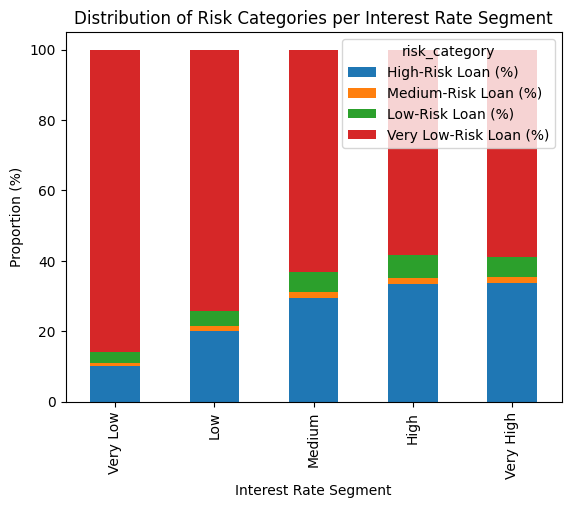

In [14]:
risk_distribution[['High-Risk Loan (%)', 'Medium-Risk Loan (%)', 'Low-Risk Loan (%)', 'Very Low-Risk Loan (%)']].plot(kind='bar', stacked=True)
plt.ylabel('Proportion (%)')
plt.xlabel('Interest Rate Segment')
plt.title('Distribution of Risk Categories per Interest Rate Segment')
plt.show()

## 2.  Optimizing Credit History Age

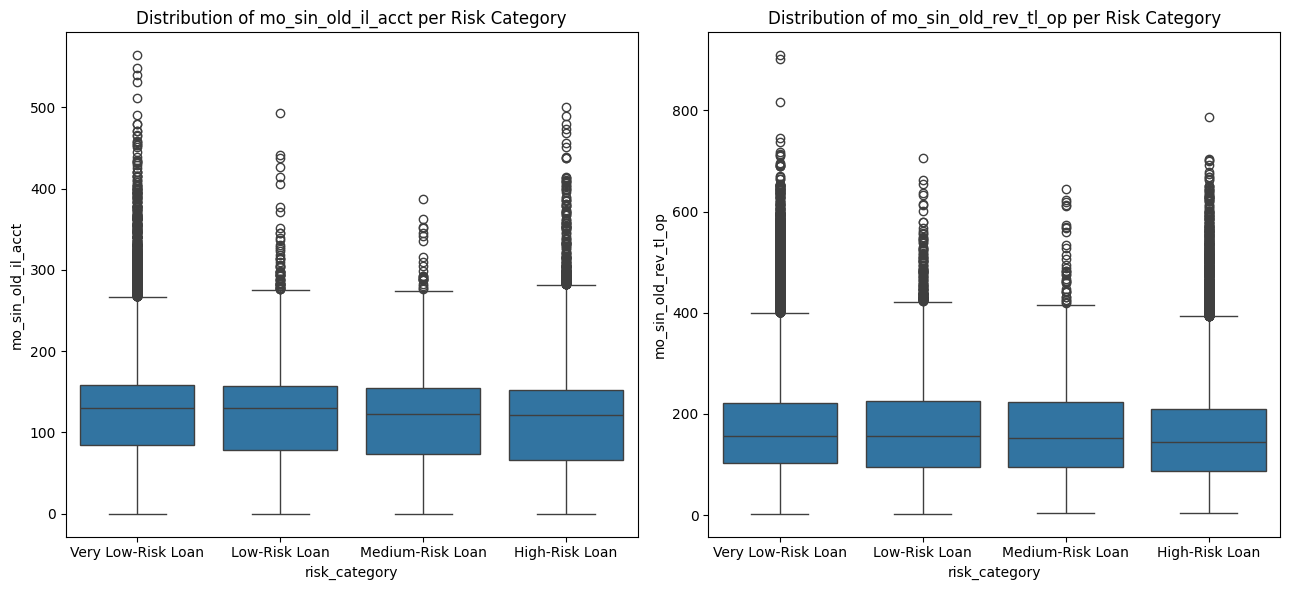

In [26]:
risk_order = ['Very Low-Risk Loan', 'Low-Risk Loan', 'Medium-Risk Loan', 'High-Risk Loan']
# List of columns for which you want to create a boxplot
column = ['mo_sin_old_il_acct', 'mo_sin_old_rev_tl_op']
# Create figures and axes
fig, ax = plt.subplots(1, len(column), figsize=(13, 6))
# Looping to create a boxplot
for i, kol in enumerate(column):
    sns.boxplot(x='risk_category', y=kol, data=df, ax=ax[i], order=risk_order)
    ax[i].set_title(f'Distribution of {kol} per Risk Category')
# Displays plots
plt.tight_layout()
plt.show()


In [30]:
# Create bins for mo_sin_old_il_acct
bins_il_acct = [0, 81, 129, 156, float('inf')]
labels_il_acct = ["< 81 months", "81-129 months", "129-156 months", "> 156 months"]
df['il_acct_segment'] = pd.cut(df['mo_sin_old_il_acct'], bins=bins_il_acct, labels=labels_il_acct)
# Create bins for mo_sin_old_rev_tl_op
bins_rev_tl_op = [0, 99, 154, 220, float('inf')]
labels_rev_tl_op = ["< 99 months", "99-154 months", "154-220 months", "> 220 months"]
df['rev_tl_op_segment'] = pd.cut(df['mo_sin_old_rev_tl_op'], bins=bins_rev_tl_op, labels=labels_rev_tl_op)


In [32]:
# Calculate the proportion of High-Risk Loans per segment
risk_distribution_il = df.groupby('il_acct_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_il['Total'] = df.groupby('il_acct_segment').size()
risk_distribution_il['High-Risk Loan (%)'] = risk_distribution_il['High-Risk Loan'] * 100

risk_distribution_rev = df.groupby('rev_tl_op_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_rev['Total'] = df.groupby('rev_tl_op_segment').size()
risk_distribution_rev['High-Risk Loan (%)'] = risk_distribution_rev['High-Risk Loan'] * 100

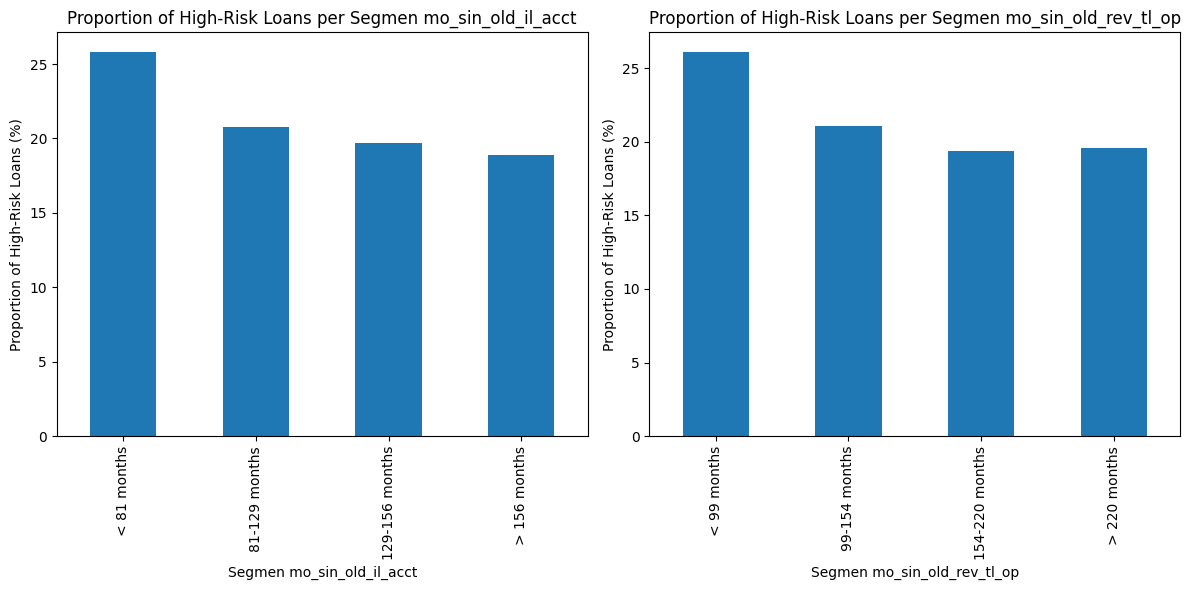

In [35]:
# List of variables you want to plot
variabel = ['risk_distribution_il', 'risk_distribution_rev']
label_x = ['Segmen mo_sin_old_il_acct', 'Segmen mo_sin_old_rev_tl_op']
judul = ['Proportion of High-Risk Loans per Segmen mo_sin_old_il_acct', 
         'Proportion of High-Risk Loans per Segmen mo_sin_old_rev_tl_op']

# Create figures and axes
fig, ax = plt.subplots(1, len(variabel), figsize=(12, 6))

# Looping to create a plot
for i, var in enumerate(variabel):
    eval(var)['High-Risk Loan (%)'].plot(kind='bar', ax=ax[i])
    ax[i].set_ylabel('Proportion of High-Risk Loans (%)')
    ax[i].set_xlabel(label_x[i])
    ax[i].set_title(judul[i])

# Displays plots
plt.tight_layout()
plt.show()

## 3. Optimizing Number of accounts

In [ ]:
# List of features
features = ['mort_acc', 'num_il_tl', 'num_rev_accts', 'num_sats']

In [10]:
df[features].describe()

,mort_acc,num_il_tl,num_rev_accts,num_sats
count,93956.000000,93956.000000,93956.000000,93956.000000
mean,1.518115,9.349972,13.570214,11.700796
std,1.827923,7.790311,8.337087,5.964644
min,0.000000,0.000000,2.000000,0.000000
25%,0.000000,4.000000,8.000000,8.000000
50%,1.000000,7.000000,12.000000,11.000000
75%,2.000000,12.000000,17.000000,15.000000
max,20.000000,90.000000,122.000000,84.000000


In [11]:
# Create bins for mort_acc
bins_mort_acc = [0, 1, 2, float('inf')]
labels_mort_acc = ["0 account", "1 account", "> 2 accounts"]
df['mort_acc_segment'] = pd.cut(df['mort_acc'], bins=bins_mort_acc, labels=labels_mort_acc)

# Create bins for num_il_tl
bins_num_il_tl = [0, 4, 7, 12, float('inf')]
labels_num_il_tl = ["< 4 accounts", "4-7 accounts", "7-12 accounts", "> 12 accounts"]
df['num_il_tl_segment'] = pd.cut(df['num_il_tl'], bins=bins_num_il_tl, labels=labels_num_il_tl)

# Create bins for num_rev_accts
bins_num_rev_accts = [0, 8, 12, 17, float('inf')]
labels_num_rev_accts = ["< 8 accounts", "8-12 accounts", "12-17 accounts", "> 17 accounts"]
df['num_rev_accts_segment'] = pd.cut(df['num_rev_accts'], bins=bins_num_rev_accts, labels=labels_num_rev_accts)

# Create bins for num_sats
bins_num_sats = [0, 8, 11, 15, float('inf')]
labels_num_sats = ["< 8 accounts", "8-11 accounts", "11-15 accounts", "> 15 accounts"]
df['num_sats_segment'] = pd.cut(df['num_sats'], bins=bins_num_sats, labels=labels_num_sats)

In [13]:
# Calculate the proportion of High-Risk Loans per segment
risk_distribution_mort_acc = df.groupby('mort_acc_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_mort_acc['Total'] = df.groupby('mort_acc_segment').size()
risk_distribution_mort_acc['High-Risk Loan (%)'] = risk_distribution_mort_acc['High-Risk Loan'] * 100

risk_distribution_num_il_tl = df.groupby('num_il_tl_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_num_il_tl['Total'] = df.groupby('num_il_tl_segment').size()
risk_distribution_num_il_tl['High-Risk Loan (%)'] = risk_distribution_num_il_tl['High-Risk Loan'] * 100

risk_distribution_num_rev_accts = df.groupby('num_rev_accts_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_num_rev_accts['Total'] = df.groupby('num_rev_accts_segment').size()
risk_distribution_num_rev_accts['High-Risk Loan (%)'] = risk_distribution_num_rev_accts['High-Risk Loan'] * 100

risk_distribution_num_sats = df.groupby('num_sats_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_num_sats['Total'] = df.groupby('num_sats_segment').size()
risk_distribution_num_sats['High-Risk Loan (%)'] = risk_distribution_num_sats['High-Risk Loan'] * 100

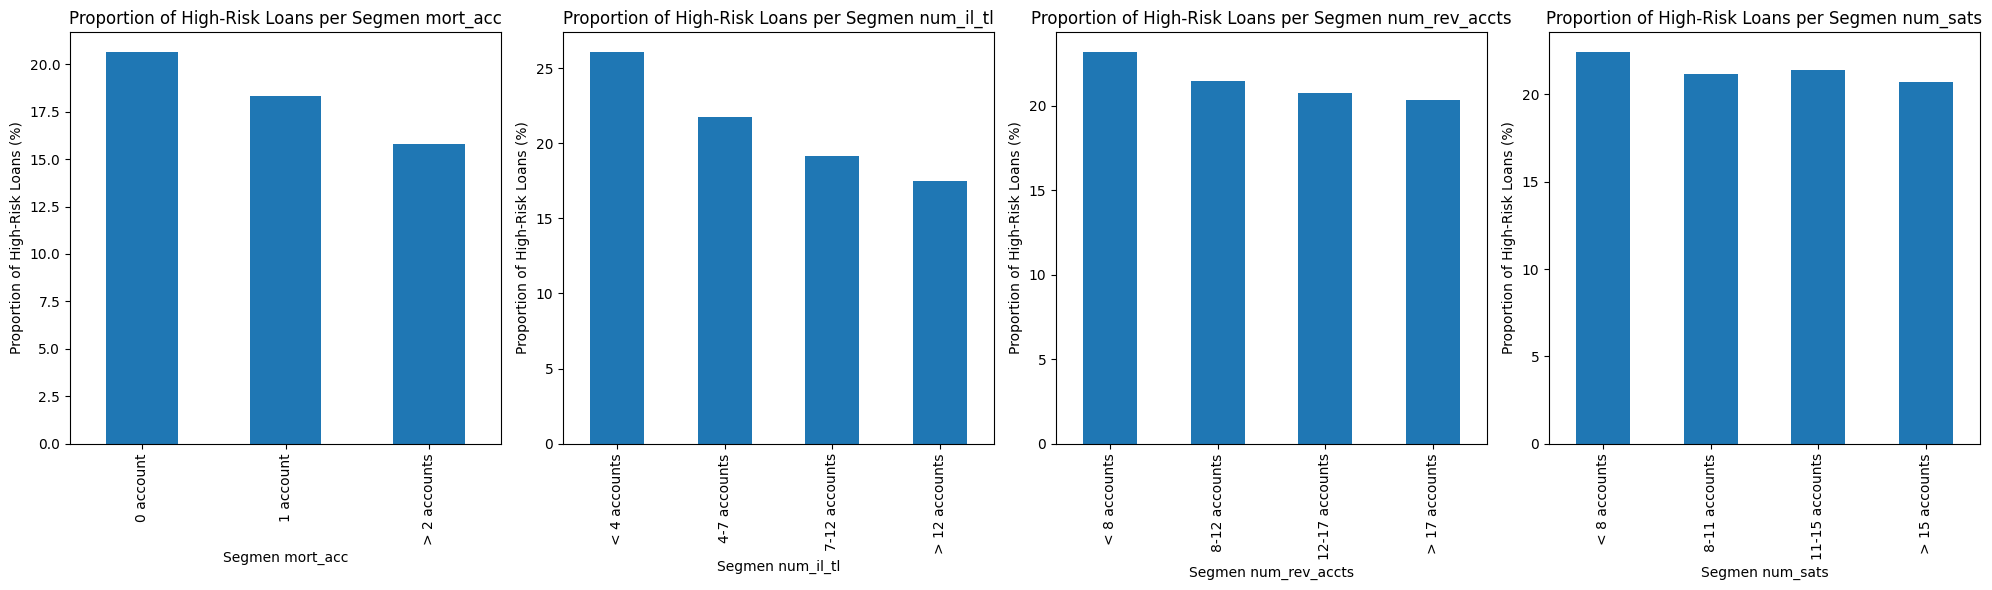

In [15]:
# List of variables you want to plot
variabel = ['risk_distribution_mort_acc', 'risk_distribution_num_il_tl', 
             'risk_distribution_num_rev_accts', 'risk_distribution_num_sats']

# List of x labels for each plot
label_x = ['Segmen mort_acc', 'Segmen num_il_tl', 'Segmen num_rev_accts', 'Segmen num_sats']

# Create figures and axes
fig, ax = plt.subplots(1, len(variabel), figsize=(20, 6))

# Looping to create a plot
for i, var in enumerate(variabel):
    eval(var)['High-Risk Loan (%)'].plot(kind='bar', ax=ax[i])
    ax[i].set_ylabel('Proportion of High-Risk Loans (%)')
    ax[i].set_xlabel(label_x[i])
    ax[i].set_title(f'Proportion of High-Risk Loans per {label_x[i]}')

# Displays plots
plt.tight_layout()
plt.show()

## 4. Optimizing Total Balance & Credit Limit

In [3]:
features = ['total_bal_ex_mort', 'total_bc_limit', 'total_il_high_credit_limit', 'total_bal_il', 'total_rev_hi_lim']

In [4]:
df[features].describe()

,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_bal_il,total_rev_hi_lim
count,9.395600e+04,9.395600e+04,9.395600e+04,9.395600e+04,9.395600e+04
mean,5.613994e+04,2.887534e+04,4.983873e+04,3.961803e+04,4.145265e+04
std,5.603298e+04,2.780361e+04,5.035296e+04,4.795038e+04,3.951287e+04
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.172900e+04,1.050000e+04,1.706100e+04,1.038975e+04,1.760000e+04
50%,4.097100e+04,2.080000e+04,3.743300e+04,2.632200e+04,3.100000e+04
75%,7.157575e+04,3.820000e+04,6.715025e+04,5.153625e+04,5.260000e+04
max,1.357906e+06,1.058000e+06,1.650162e+06,1.101056e+06,1.571800e+06


In [5]:
df[features]

,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit,total_bal_il,total_rev_hi_lim
0,19021.0,2500.0,19781.0,16136.0,6600.0
1,7246.0,34200.0,9025.0,6549.0,34200.0
2,128960.0,76000.0,106758.0,66285.0,84200.0
3,1719.0,2500.0,0.0,0.0,2500.0
4,66081.0,34500.0,79536.0,57104.0,35000.0
...,...,...,...,...,...
93951,5271.0,10000.0,5000.0,3578.0,25500.0
93952,49511.0,10000.0,65417.0,40922.0,16500.0
93953,54759.0,13000.0,59103.0,48466.0,17700.0
93954,28422.0,33800.0,29513.0,20962.0,45700.0


In [ ]:
# Create bins for total_bal_ex_mort
bins_total_bal_ex_mort = [0, 21729, 40971, 71575.75, float('inf')]
labels_total_bal_ex_mort = ["< 21,729", "21,729-40,971", "40,971-71,575.75", "> 71,575.75"]
df['total_bal_ex_mort_segment'] = pd.cut(df['total_bal_ex_mort'], bins=bins_total_bal_ex_mort, labels=labels_total_bal_ex_mort)

# Create bins for total_bc_limit
bins_total_bc_limit = [0, 10500, 20800, 38200, float('inf')]
labels_total_bc_limit = ["< 10,500", "10,500-20,800", "20,800-38,200", "> 38,200"]
df['total_bc_limit_segment'] = pd.cut(df['total_bc_limit'], bins=bins_total_bc_limit, labels=labels_total_bc_limit)

# Create bins for total_il_high_credit_limit
bins_total_il_high_credit_limit = [0, 17061, 37433, 67150.25, float('inf')]
labels_total_il_high_credit_limit = ["< 17,061", "17,061-37,433", "37,433-67,150.25", "> 67,150.25"]
df['total_il_high_credit_limit_segment'] = pd.cut(df['total_il_high_credit_limit'], bins=bins_total_il_high_credit_limit, labels=labels_total_il_high_credit_limit)

# Create bins for total_bal_il
bins_total_bal_il = [0, 10389.75, 26322, 51536.25, float('inf')]
labels_total_bal_il = ["< 10,389.75", "10,389.75-26,322", "26,322-51,536.25", "> 51,536.25"]
df['total_bal_il_segment'] = pd.cut(df['total_bal_il'], bins=bins_total_bal_il, labels=labels_total_bal_il)

# Create bins for total_rev_hi_lim
bins_total_rev_hi_lim = [0, 17600, 31000, 52600, float('inf')]
labels_total_rev_hi_lim = ["< 17,600", "17,600-31,000", "31,000-52,600", "> 52,600"]
df['total_rev_hi_lim_segment'] = pd.cut(df['total_rev_hi_lim'], bins=bins_total_rev_hi_lim, labels=labels_total_rev_hi_lim)

In [7]:
# Calculate the proportion of High-Risk Loans per segment
risk_distribution_total_bal_ex_mort = df.groupby('total_bal_ex_mort_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_total_bal_ex_mort['Total'] = df.groupby('total_bal_ex_mort_segment').size()
risk_distribution_total_bal_ex_mort['High-Risk Loan (%)'] = risk_distribution_total_bal_ex_mort['High-Risk Loan'] * 100

risk_distribution_total_bc_limit = df.groupby('total_bc_limit_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_total_bc_limit['Total'] = df.groupby('total_bc_limit_segment').size()
risk_distribution_total_bc_limit['High-Risk Loan (%)'] = risk_distribution_total_bc_limit['High-Risk Loan'] * 100

risk_distribution_total_il_high_credit_limit = df.groupby('total_il_high_credit_limit_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_total_il_high_credit_limit['Total'] = df.groupby('total_il_high_credit_limit_segment').size()
risk_distribution_total_il_high_credit_limit['High-Risk Loan (%)'] = risk_distribution_total_il_high_credit_limit['High-Risk Loan'] * 100

risk_distribution_total_bal_il = df.groupby('total_bal_il_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_total_bal_il['Total'] = df.groupby('total_bal_il_segment').size()
risk_distribution_total_bal_il['High-Risk Loan (%)'] = risk_distribution_total_bal_il['High-Risk Loan'] * 100

risk_distribution_total_rev_hi_lim = df.groupby('total_rev_hi_lim_segment')['risk_category'].value_counts(normalize=True).unstack()
risk_distribution_total_rev_hi_lim['Total'] = df.groupby('total_rev_hi_lim_segment').size()
risk_distribution_total_rev_hi_lim['High-Risk Loan (%)'] = risk_distribution_total_rev_hi_lim['High-Risk Loan'] * 100

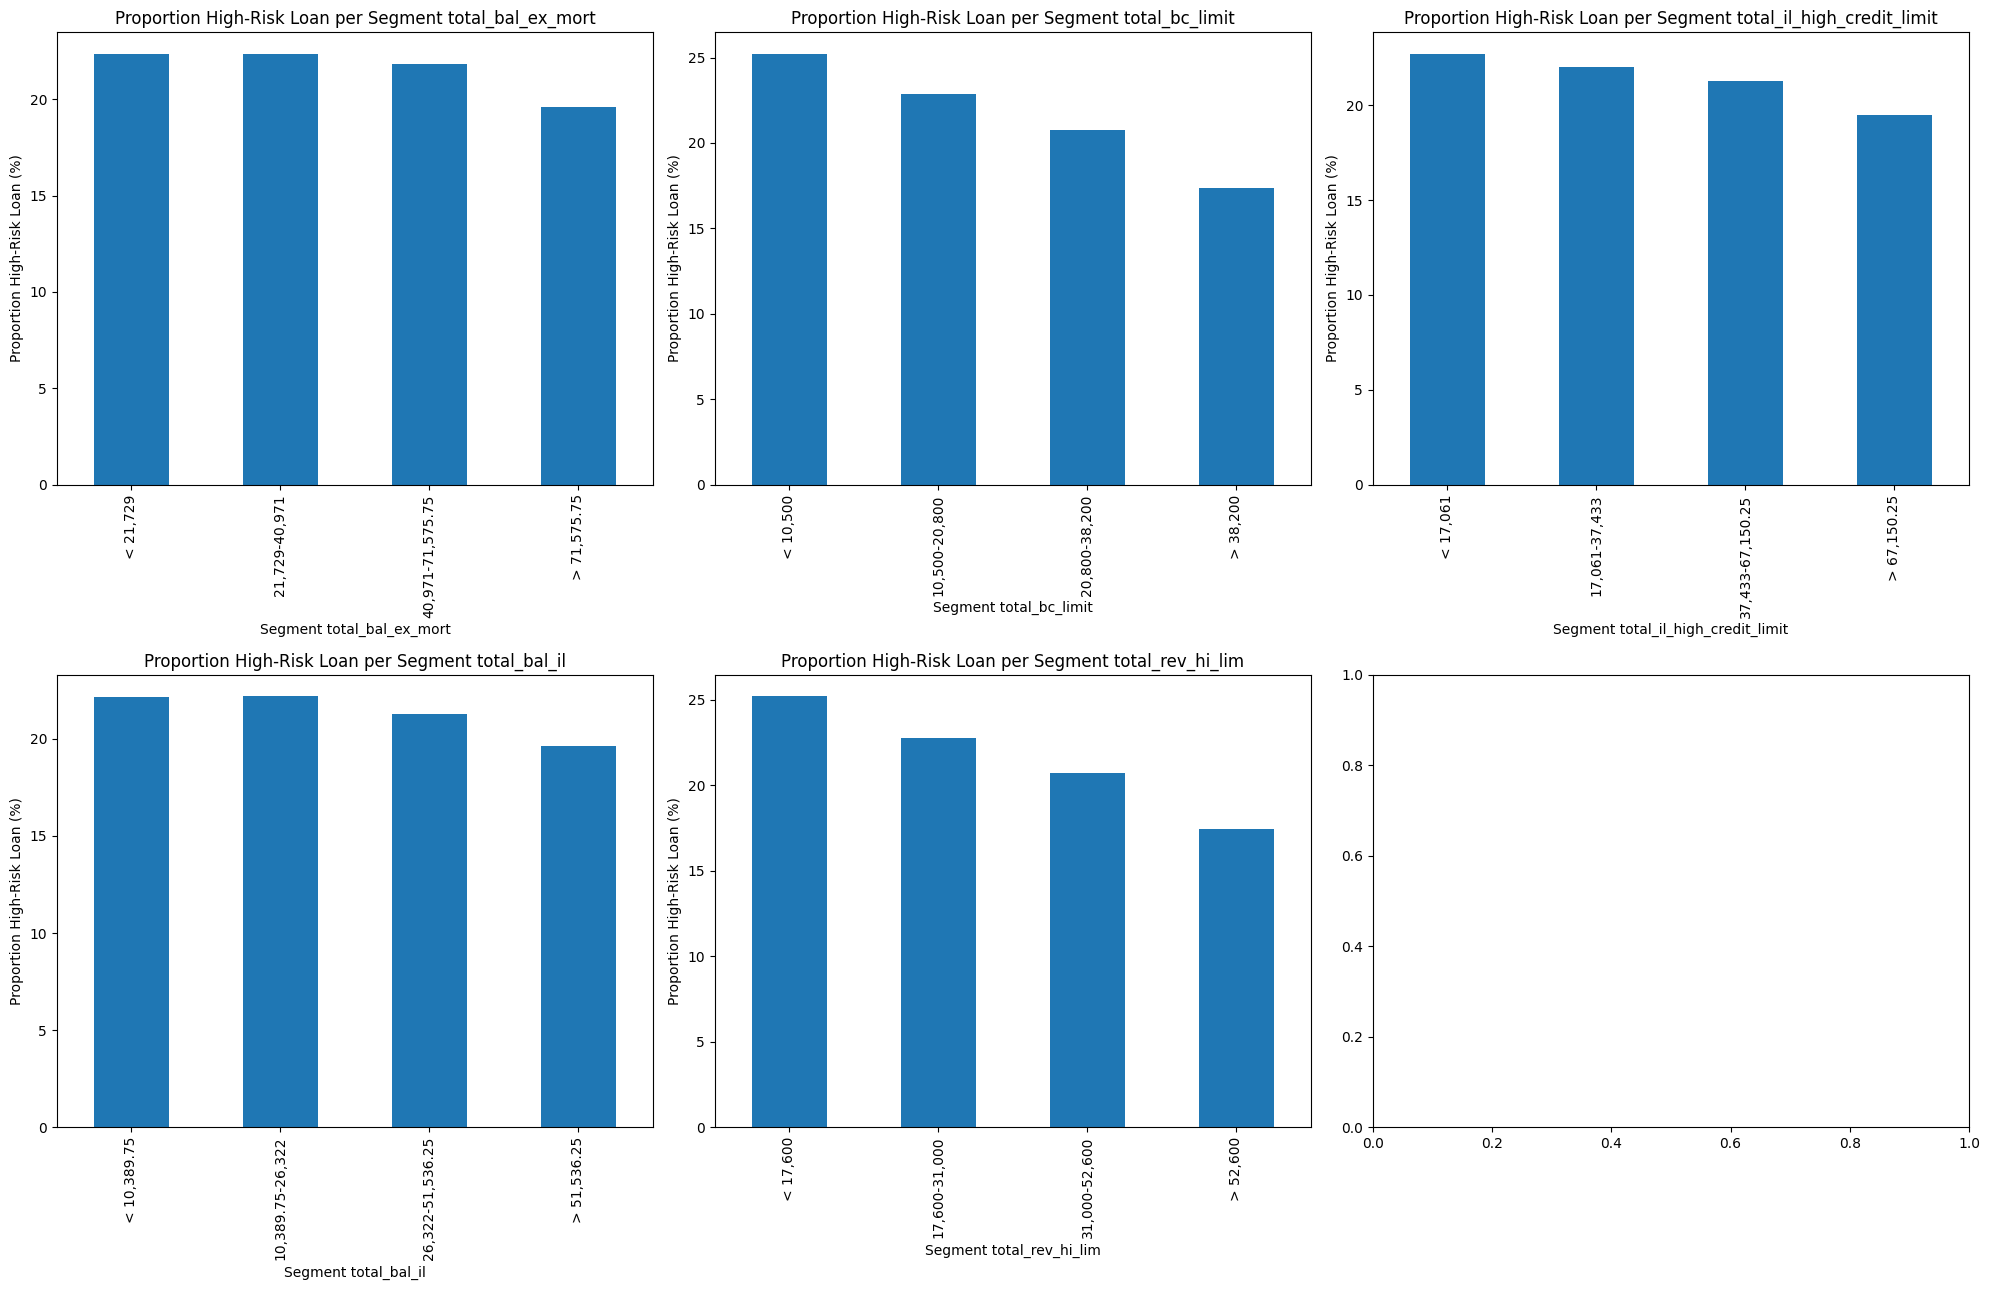

In [12]:

# List of variables to plot
variabel = [
    'risk_distribution_total_bal_ex_mort',
    'risk_distribution_total_bc_limit',
    'risk_distribution_total_il_high_credit_limit',
    'risk_distribution_total_bal_il',
    'risk_distribution_total_rev_hi_lim'
]

# List of x labels and titles for each plot
label_x = [
    'Segment total_bal_ex_mort',
    'Segment total_bc_limit',
    'Segment total_il_high_credit_limit',
    'Segment total_bal_il',
    'Segment total_rev_hi_lim'
]

# Create figures and axes
fig, ax = plt.subplots(2, 3, figsize=(20, 13))

# Looping to create a plot
for i, var in enumerate(variabel):
    eval(var)['High-Risk Loan (%)'].plot(kind='bar', ax=ax[i//3, i%3])
    ax[i//3, i%3].set_ylabel('Proportion High-Risk Loan (%)')
    ax[i//3, i%3].set_xlabel(label_x[i])
    ax[i//3, i%3].set_title(f'Proportion High-Risk Loan per {label_x[i]}')

# Displays plots
plt.tight_layout()
plt.show()